In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('FinalDatav1.csv')

In [3]:
df = df.drop(['Unnamed: 0'], axis = 1)
pd.options.display.max_columns = None

df.head()

Trip Start Timestamp      Trip End Timestamp  Trip Seconds  Trip Miles  \
0  03/24/2019 10:30:00 AM  03/24/2019 10:45:00 AM         790.0         5.6   
1  03/24/2019 10:15:00 AM  03/24/2019 10:30:00 AM         664.0         5.8   
2  03/24/2019 10:15:00 AM  03/24/2019 10:30:00 AM        1034.0         4.6   
3  03/24/2019 10:30:00 AM  03/24/2019 11:00:00 AM        2061.0        17.6   
4  03/24/2019 10:15:00 AM  03/24/2019 10:15:00 AM         503.0         1.2   

   Pickup Census Tract  Dropoff Census Tract  Pickup Community Area  \
0                  NaN                   NaN                   48.0   
1         1.703183e+10          1.703108e+10                    3.0   
2                  NaN                   NaN                   19.0   
3         1.703108e+10          1.703198e+10                    8.0   
4         1.703108e+10          1.703108e+10                    8.0   

   Dropoff Community Area  Fare  Tip  Additional Charges  Trip Total  \
0                    53.0  10.0  0.0                2.55       12.55   
1                     8.0  10.0  2.0                2.55       14.55   
2                    24.0   7.5  0.0                0.00        7.50   
3                    76.0  25.0  5.0                7.55       37.55   
4                     8.0   5.0  0.0                2.55        7.55   

   Shared Trip Authorized  Trips Pooled  Pickup Centroid Latitude  \
0                   False             1                 41.729676   
1                   False             1                 41.958056   
2                    True             1                 41.927261   
3                   False             1                 41.907520   
4                   False             1                 41.895033   

   Pickup Centroid Longitude              Pickup Centroid Location  \
0                 -87.572717  POINT (-87.5727171342 41.7296764229)   
1                 -87.660389   POINT (-87.6603894557 41.958055933)   
2                 -87.765502  POINT (-87.7655016086 41.9272609555)   
3                 -87.626659  POINT (-87.6266589003 41.9075200747)   
4                 -87.619711  POINT (-87.6197106717 41.8950334495)   

   Dropoff Centroid Latitude  Dropoff Centroid Longitude  \
0                  41.673820                  -87.635740   
1                  41.890922                  -87.618868   
2                  41.901207                  -87.676356   
3                  41.979071                  -87.903040   
4                  41.905858                  -87.630865   

              Dropoff Centroid Location             Trip Start UTC  \
0  POINT (-87.6357397768 41.6738199043)  2019-03-24 10:30:00+00:00   
1  POINT (-87.6188683546 41.8909220259)  2019-03-24 10:15:00+00:00   
2  POINT (-87.6763559892 41.9012069941)  2019-03-24 10:15:00+00:00   
3  POINT (-87.9030396611 41.9790708201)  2019-03-24 10:30:00+00:00   
4  POINT (-87.6308650266 41.9058577688)  2019-03-24 10:15:00+00:00   

          Trip Start Chicago               Trip End UTC  \
0  2019-03-24 05:30:00-05:00  2019-03-24 10:45:00+00:00   
1  2019-03-24 05:15:00-05:00  2019-03-24 10:30:00+00:00   
2  2019-03-24 05:15:00-05:00  2019-03-24 10:30:00+00:00   
3  2019-03-24 05:30:00-05:00  2019-03-24 11:00:00+00:00   
4  2019-03-24 05:15:00-05:00  2019-03-24 10:15:00+00:00   

            Trip End Chicago        Date  Hour              time  \
0  2019-03-24 05:45:00-05:00  2019-03-24     5  2019-03-24T05:00   
1  2019-03-24 05:30:00-05:00  2019-03-24     5  2019-03-24T05:00   
2  2019-03-24 05:30:00-05:00  2019-03-24     5  2019-03-24T05:00   
3  2019-03-24 06:00:00-05:00  2019-03-24     5  2019-03-24T05:00   
4  2019-03-24 05:15:00-05:00  2019-03-24     5  2019-03-24T05:00   

   temperature_2m (°C)  relativehumidity_2m (%)  precipitation (mm)  \
0                  3.6                       73                 0.0   
1                  3.6                       73                 0.0   
2                  3.6                       73                 0.0   
3   

# Pickup

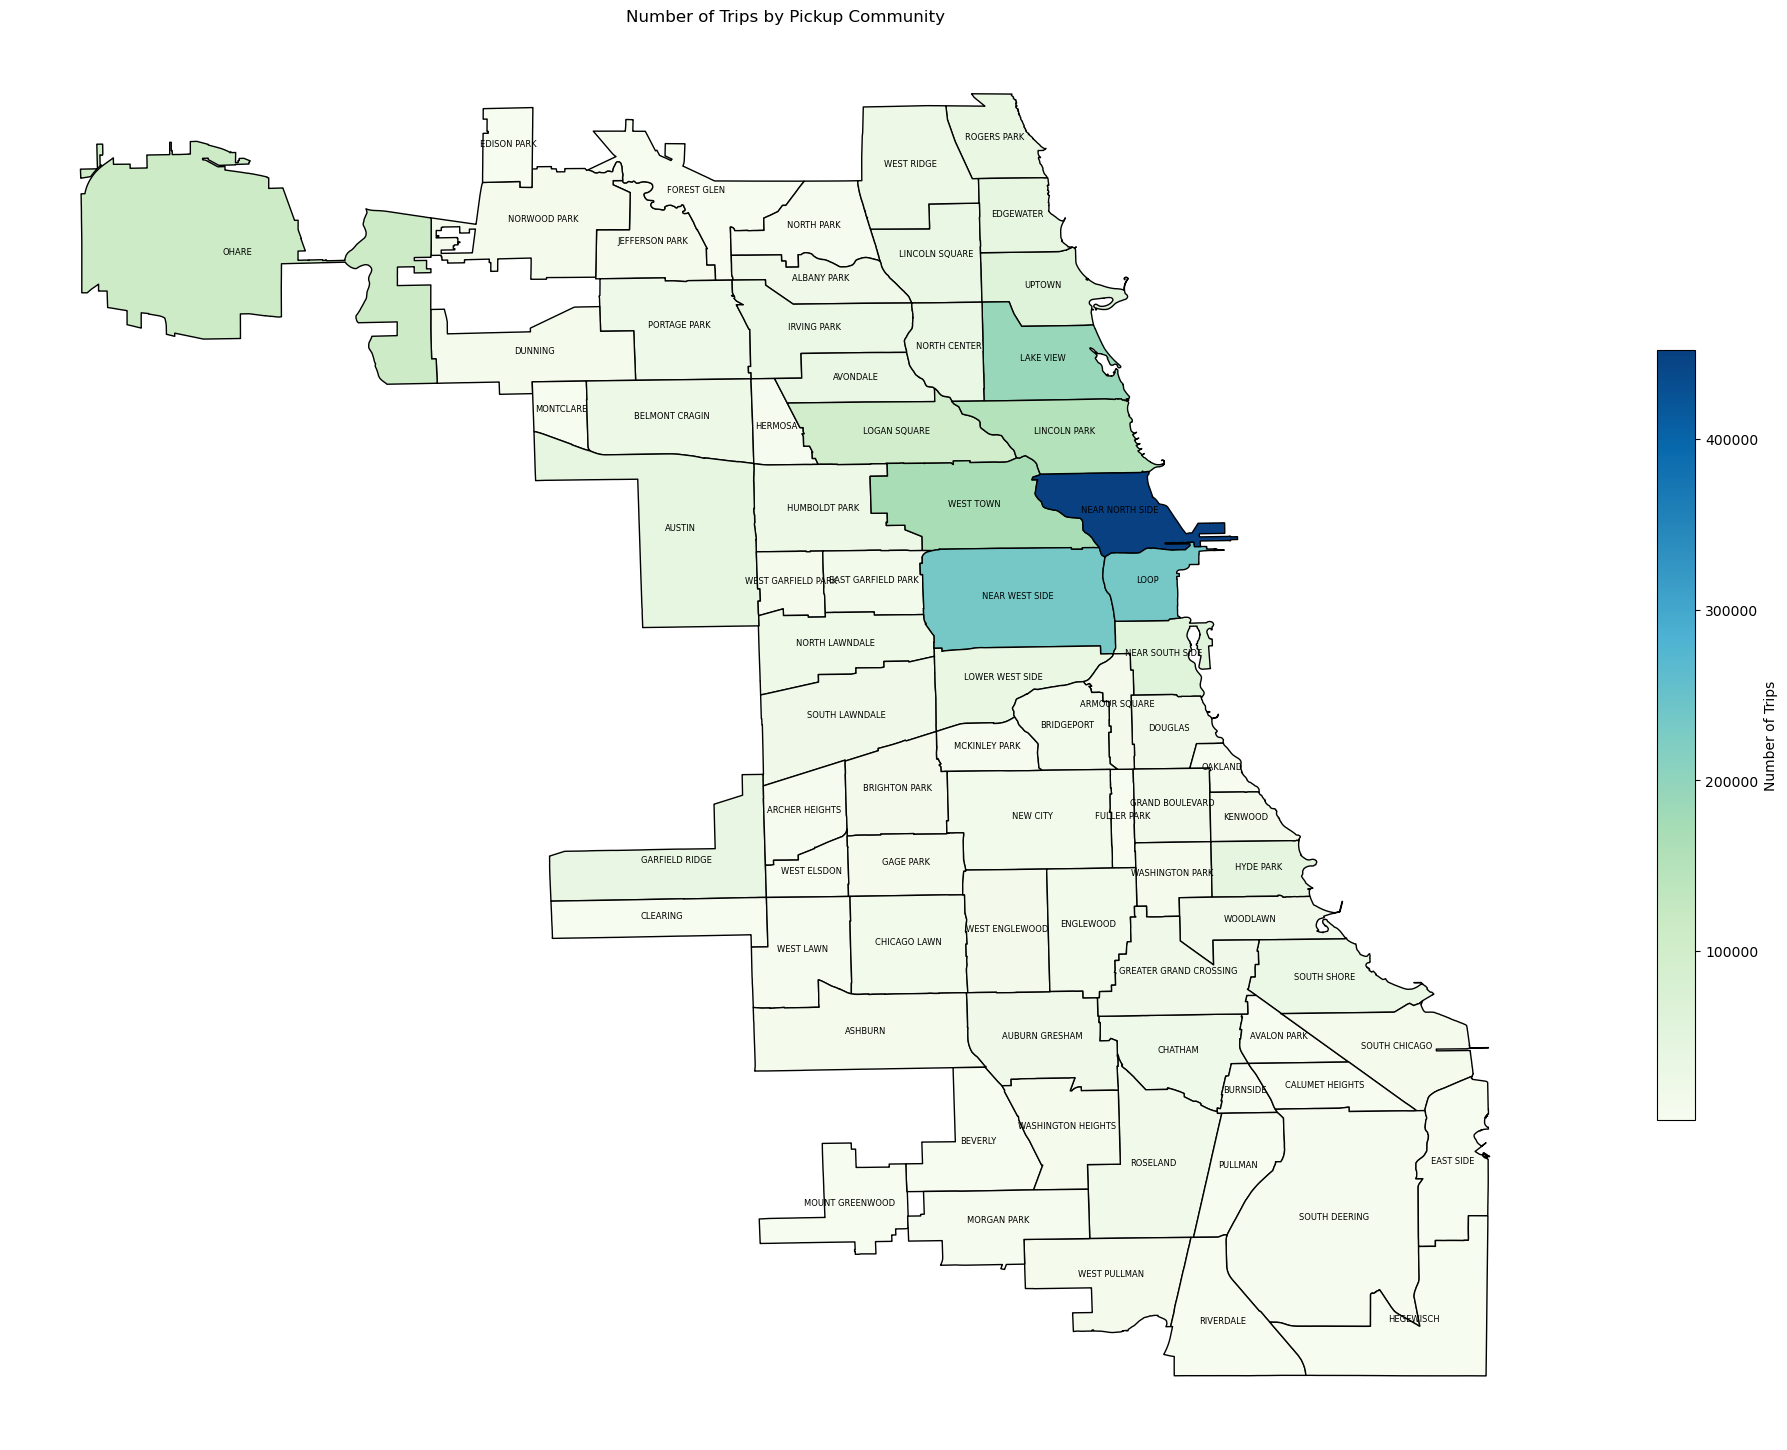

In [4]:
# group by Pickup Community Name and count the trips
counts = df.groupby('Pickup Community Name').size().reset_index(name='count')

counts['Pickup Community Name'] = counts['Pickup Community Name'].str.upper()

counts.loc[counts['Pickup Community Name'] == 'THE LOOP', 'Pickup Community Name'] = 'LOOP'
counts.loc[counts['Pickup Community Name'] == "O'HARE", 'Pickup Community Name'] = 'OHARE'

# load the shapefile for Chicago community areas
chicago = gpd.read_file('geo_export_5c6812e1-58be-49dd-be9c-006ddc3ae094.shp')

# merge the counts with the shapefile based on the community area name
map_df = chicago.merge(counts, left_on='community', right_on='Pickup Community Name')

# plot the map
fig, ax = plt.subplots(figsize=(25, 20))
map_df.plot(column='count', cmap='GnBu', linewidth=1, ax=ax, edgecolor='0', legend=True, legend_kwds={
    'label': "Number of Trips", 'orientation': "vertical", 'shrink': 0.5})

# add community names to the plot
for idx, row in map_df.iterrows():
    plt.annotate(text=row['community'], xy=row['geometry'].centroid.coords[0], ha='center', fontsize=6)
    
    
ax.axis('off')
ax.set_aspect('equal')
plt.title('Number of Trips by Pickup Community')
plt.show()

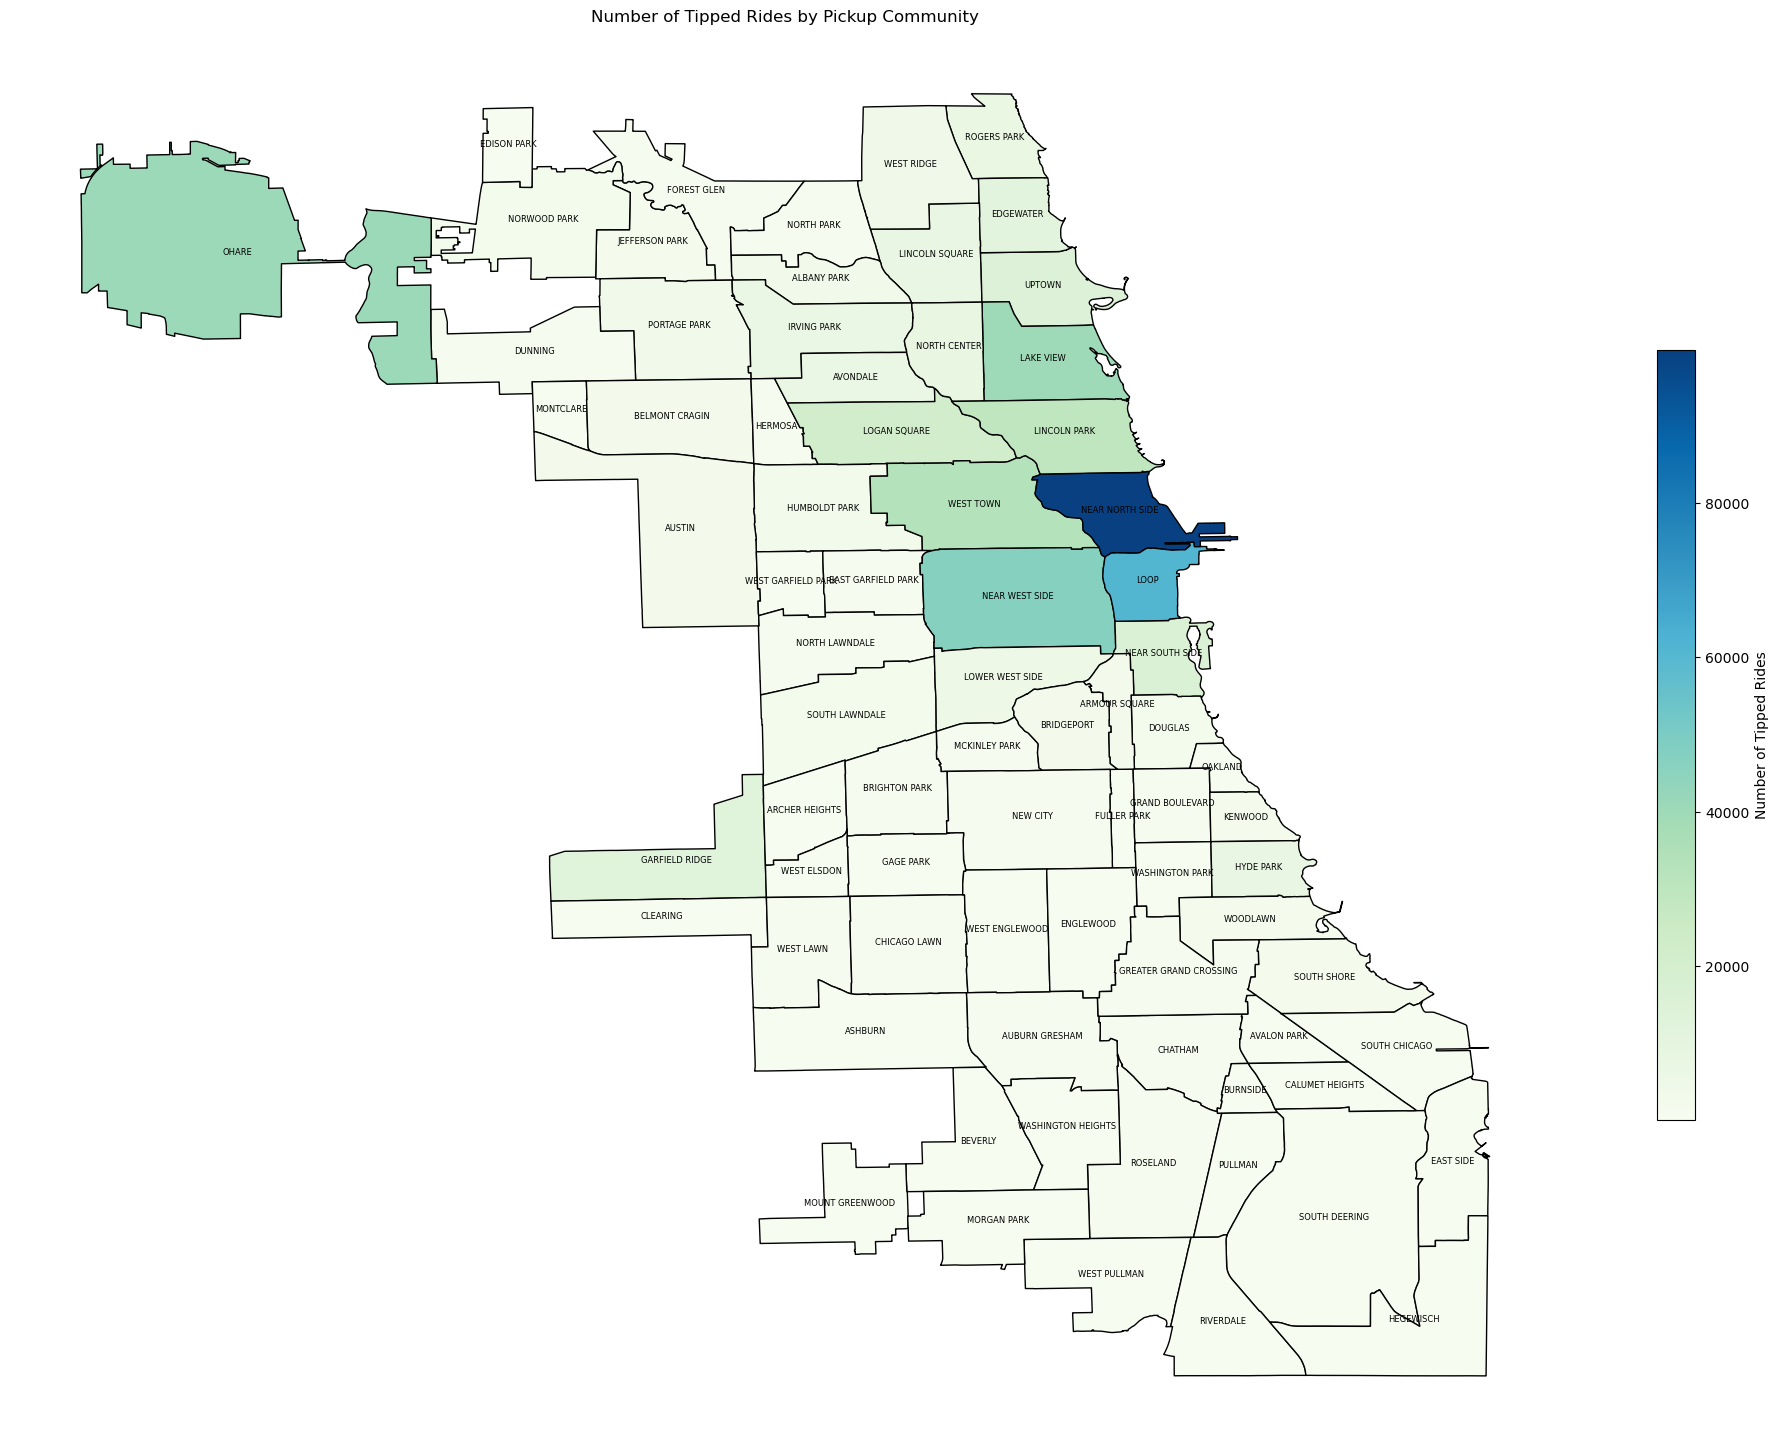

In [5]:
# group by Pickup Community Name and count the tipped rides
tipped_counts = df.groupby('Pickup Community Name')['Tipped'].apply(lambda x: (x==True).sum()).reset_index(name='tipped_count')

tipped_counts['Pickup Community Name'] = tipped_counts['Pickup Community Name'].str.upper()

tipped_counts.loc[tipped_counts['Pickup Community Name'] == 'THE LOOP', 'Pickup Community Name'] = 'LOOP'
tipped_counts.loc[tipped_counts['Pickup Community Name'] == "O'HARE", 'Pickup Community Name'] = 'OHARE'

# merge the tipped counts with the shapefile based on the community area name
tipped_map_df = chicago.merge(tipped_counts, left_on='community', right_on='Pickup Community Name')

# plot the map
fig, ax = plt.subplots(figsize=(25, 20))
tipped_map_df.plot(column='tipped_count', cmap='GnBu', linewidth=1, ax=ax, edgecolor='0', legend=True, legend_kwds={
    'label': "Number of Tipped Rides", 'orientation': "vertical", 'shrink': 0.5})

# add community names to the plot
for idx, row in tipped_map_df.iterrows():
    plt.annotate(text=row['community'], xy=row['geometry'].centroid.coords[0], ha='center', fontsize=6)

ax.axis('off')
ax.set_aspect('equal')
plt.title('Number of Tipped Rides by Pickup Community')
plt.show()

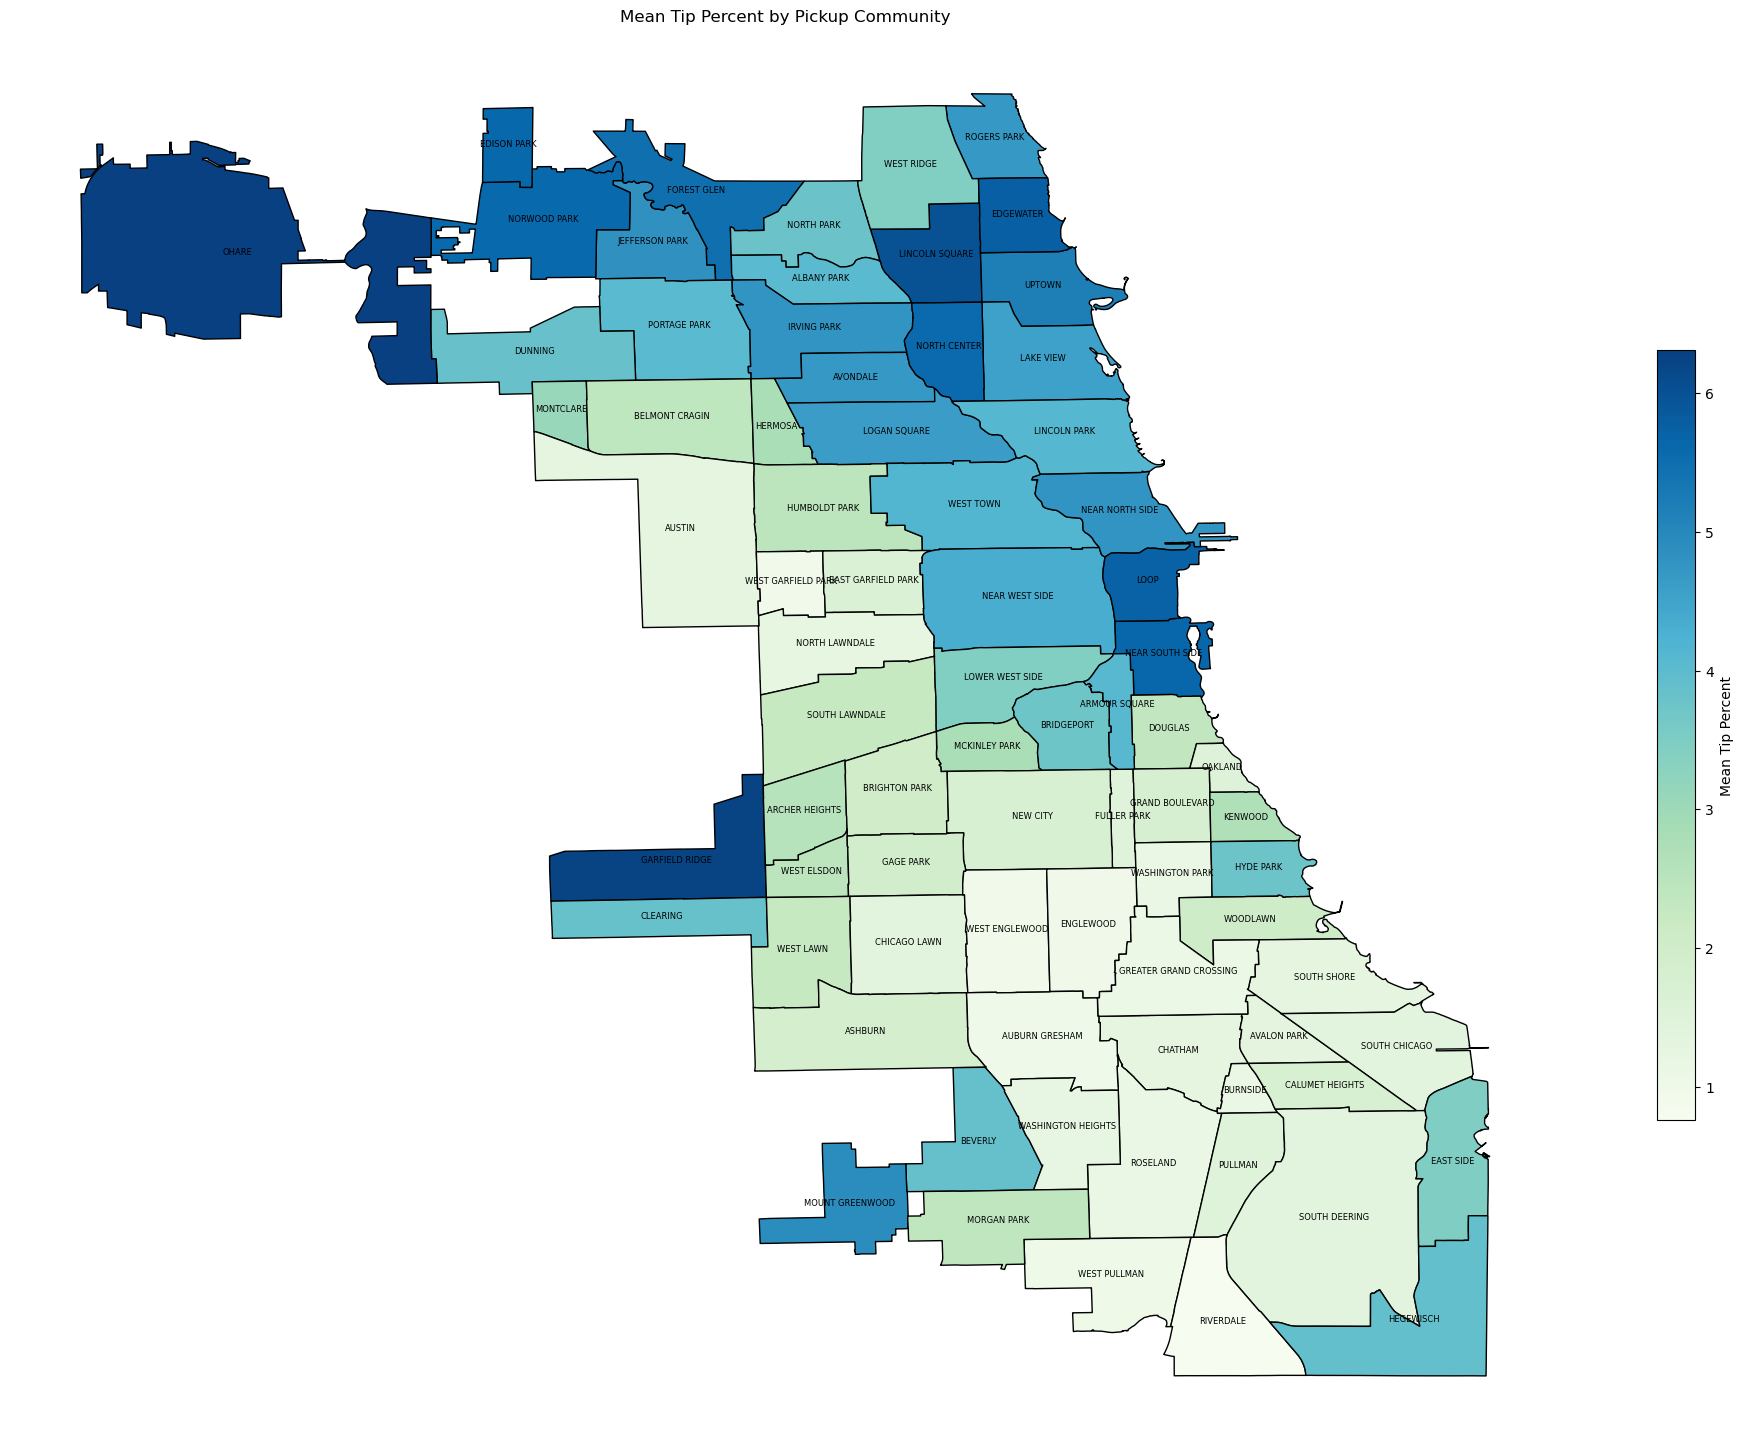

In [6]:
# group by community name and calculate the mean of tip
tip_mean_percent = df.groupby('Pickup Community Name')['Tip_percent_PerRide'].mean().reset_index(name='mean_tip_percent')

tip_mean_percent['Pickup Community Name'] = tip_mean_percent['Pickup Community Name'].str.upper()

tip_mean_percent.loc[tip_mean_percent['Pickup Community Name'] == 'THE LOOP', 'Pickup Community Name'] = 'LOOP'
tip_mean_percent.loc[tip_mean_percent['Pickup Community Name'] == "O'HARE", 'Pickup Community Name'] = 'OHARE'

# merge the mean tip with the shapefile based on the community area name
map_df = chicago.merge(tip_mean_percent, left_on='community', right_on='Pickup Community Name')

# plot the map
fig, ax = plt.subplots(figsize=(25, 20))
map_df.plot(column='mean_tip_percent', cmap='GnBu', linewidth=1, ax=ax, edgecolor='0', legend=True, legend_kwds={
    'label': "Mean Tip Percent", 'orientation': "vertical", 'shrink': 0.5})

# add community names to the plot
for idx, row in map_df.iterrows():
    plt.annotate(text=row['community'], xy=row['geometry'].centroid.coords[0], ha='center', fontsize=6)
    
ax.axis('off')
ax.set_aspect('equal')
plt.title('Mean Tip Percent by Pickup Community')
plt.show()

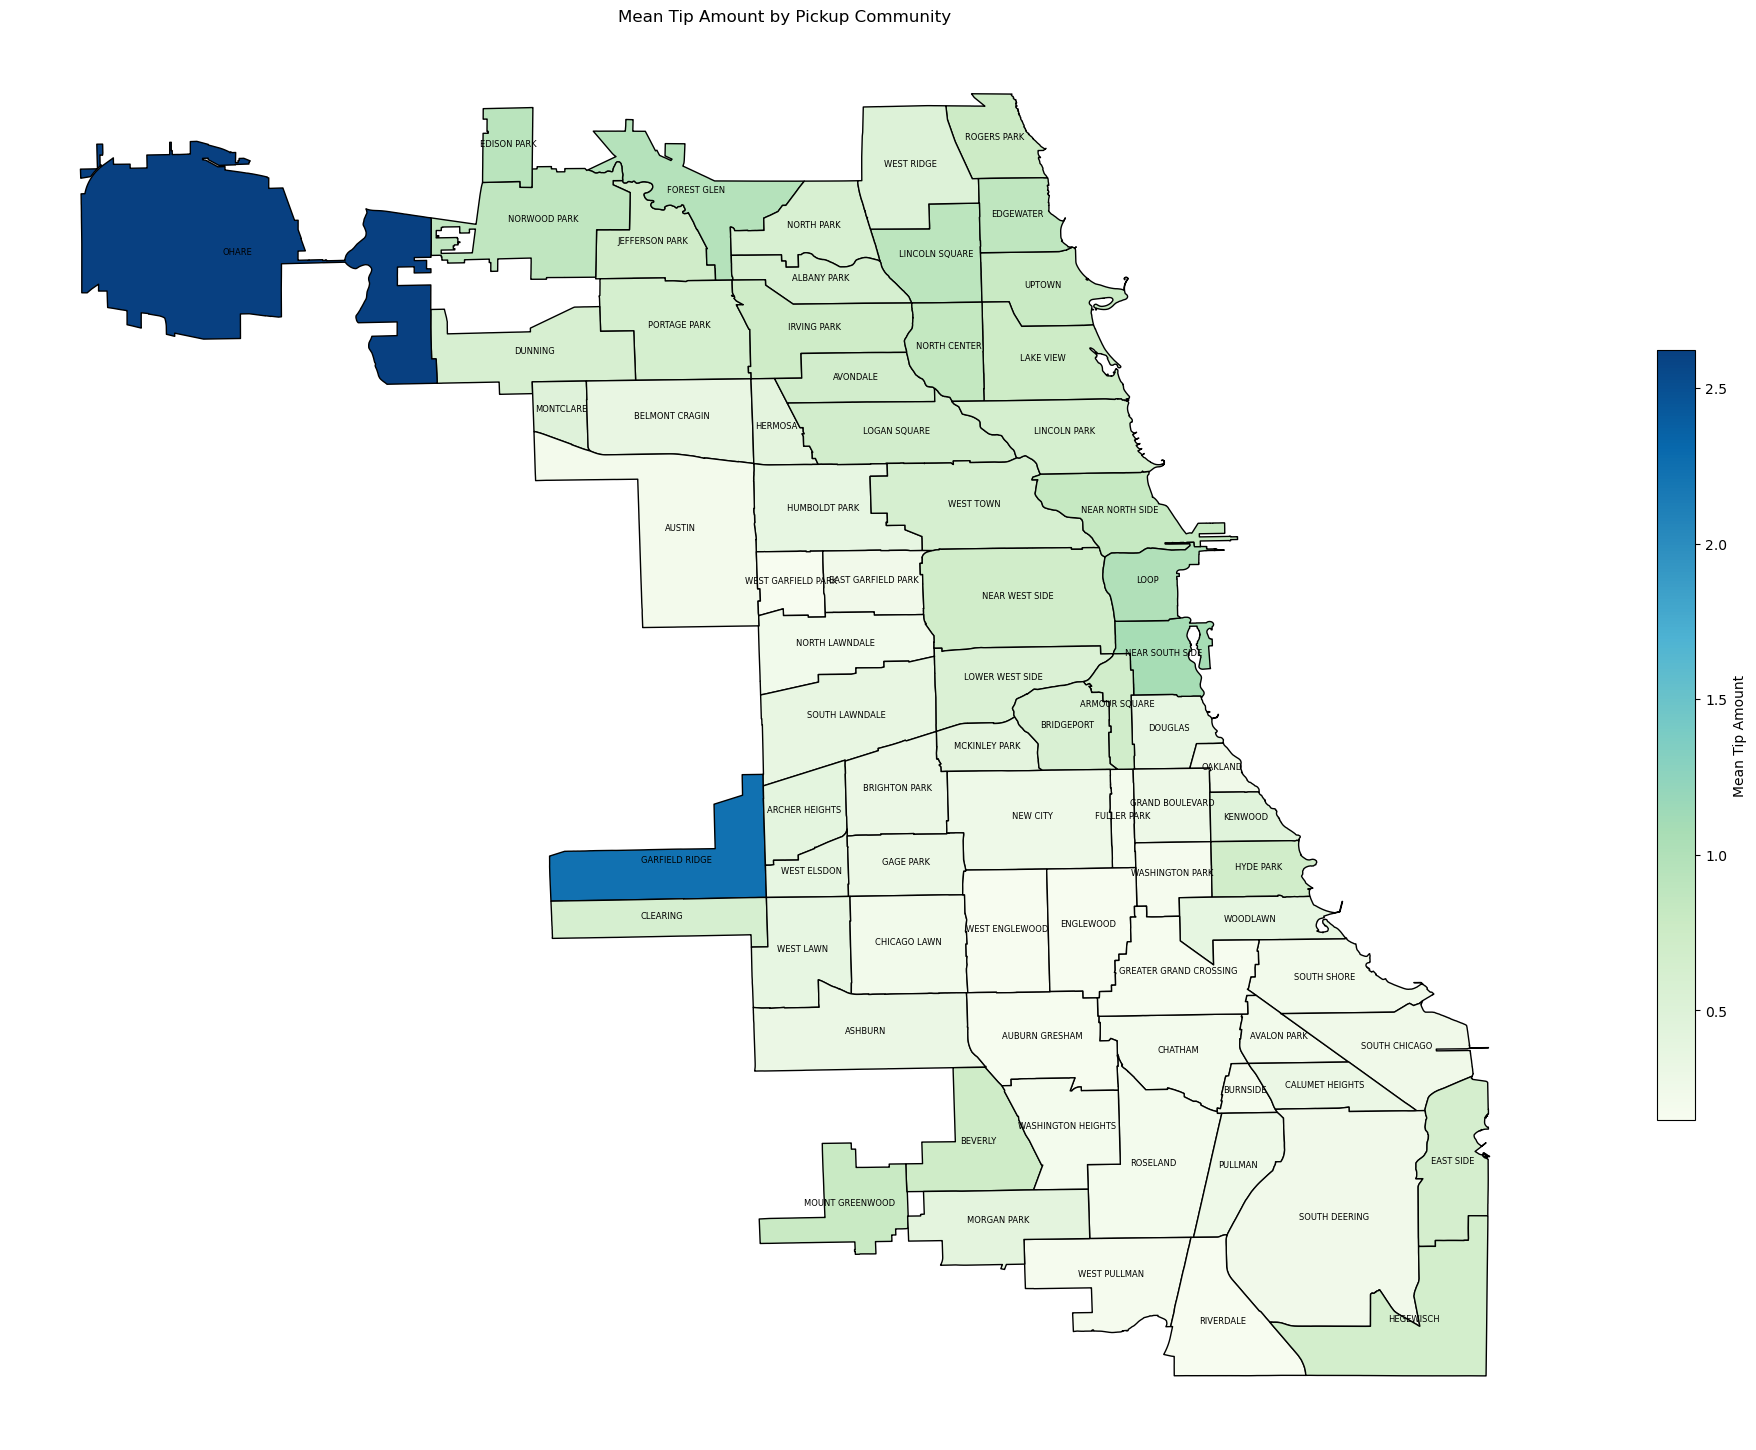

In [7]:
# group by community name and calculate the mean of tip
tip_mean = df.groupby('Pickup Community Name')['Tip'].mean().reset_index(name='mean_tip')

tip_mean['Pickup Community Name'] = tip_mean['Pickup Community Name'].str.upper()

tip_mean.loc[tip_mean['Pickup Community Name'] == 'THE LOOP', 'Pickup Community Name'] = 'LOOP'
tip_mean.loc[tip_mean['Pickup Community Name'] == "O'HARE", 'Pickup Community Name'] = 'OHARE'

# merge the mean tip with the shapefile based on the community area name
map_df = chicago.merge(tip_mean, left_on='community', right_on='Pickup Community Name')

# plot the map
fig, ax = plt.subplots(figsize=(25, 20))
map_df.plot(column='mean_tip', cmap='GnBu', linewidth=1, ax=ax, edgecolor='0', legend=True, legend_kwds={
    'label': "Mean Tip Amount", 'orientation': "vertical", 'shrink': 0.5})

# add community names to the plot
for idx, row in map_df.iterrows():
    plt.annotate(text=row['community'], xy=row['geometry'].centroid.coords[0], ha='center', fontsize=6)
    
ax.axis('off')
ax.set_aspect('equal')
plt.title('Mean Tip Amount by Pickup Community')
plt.show()

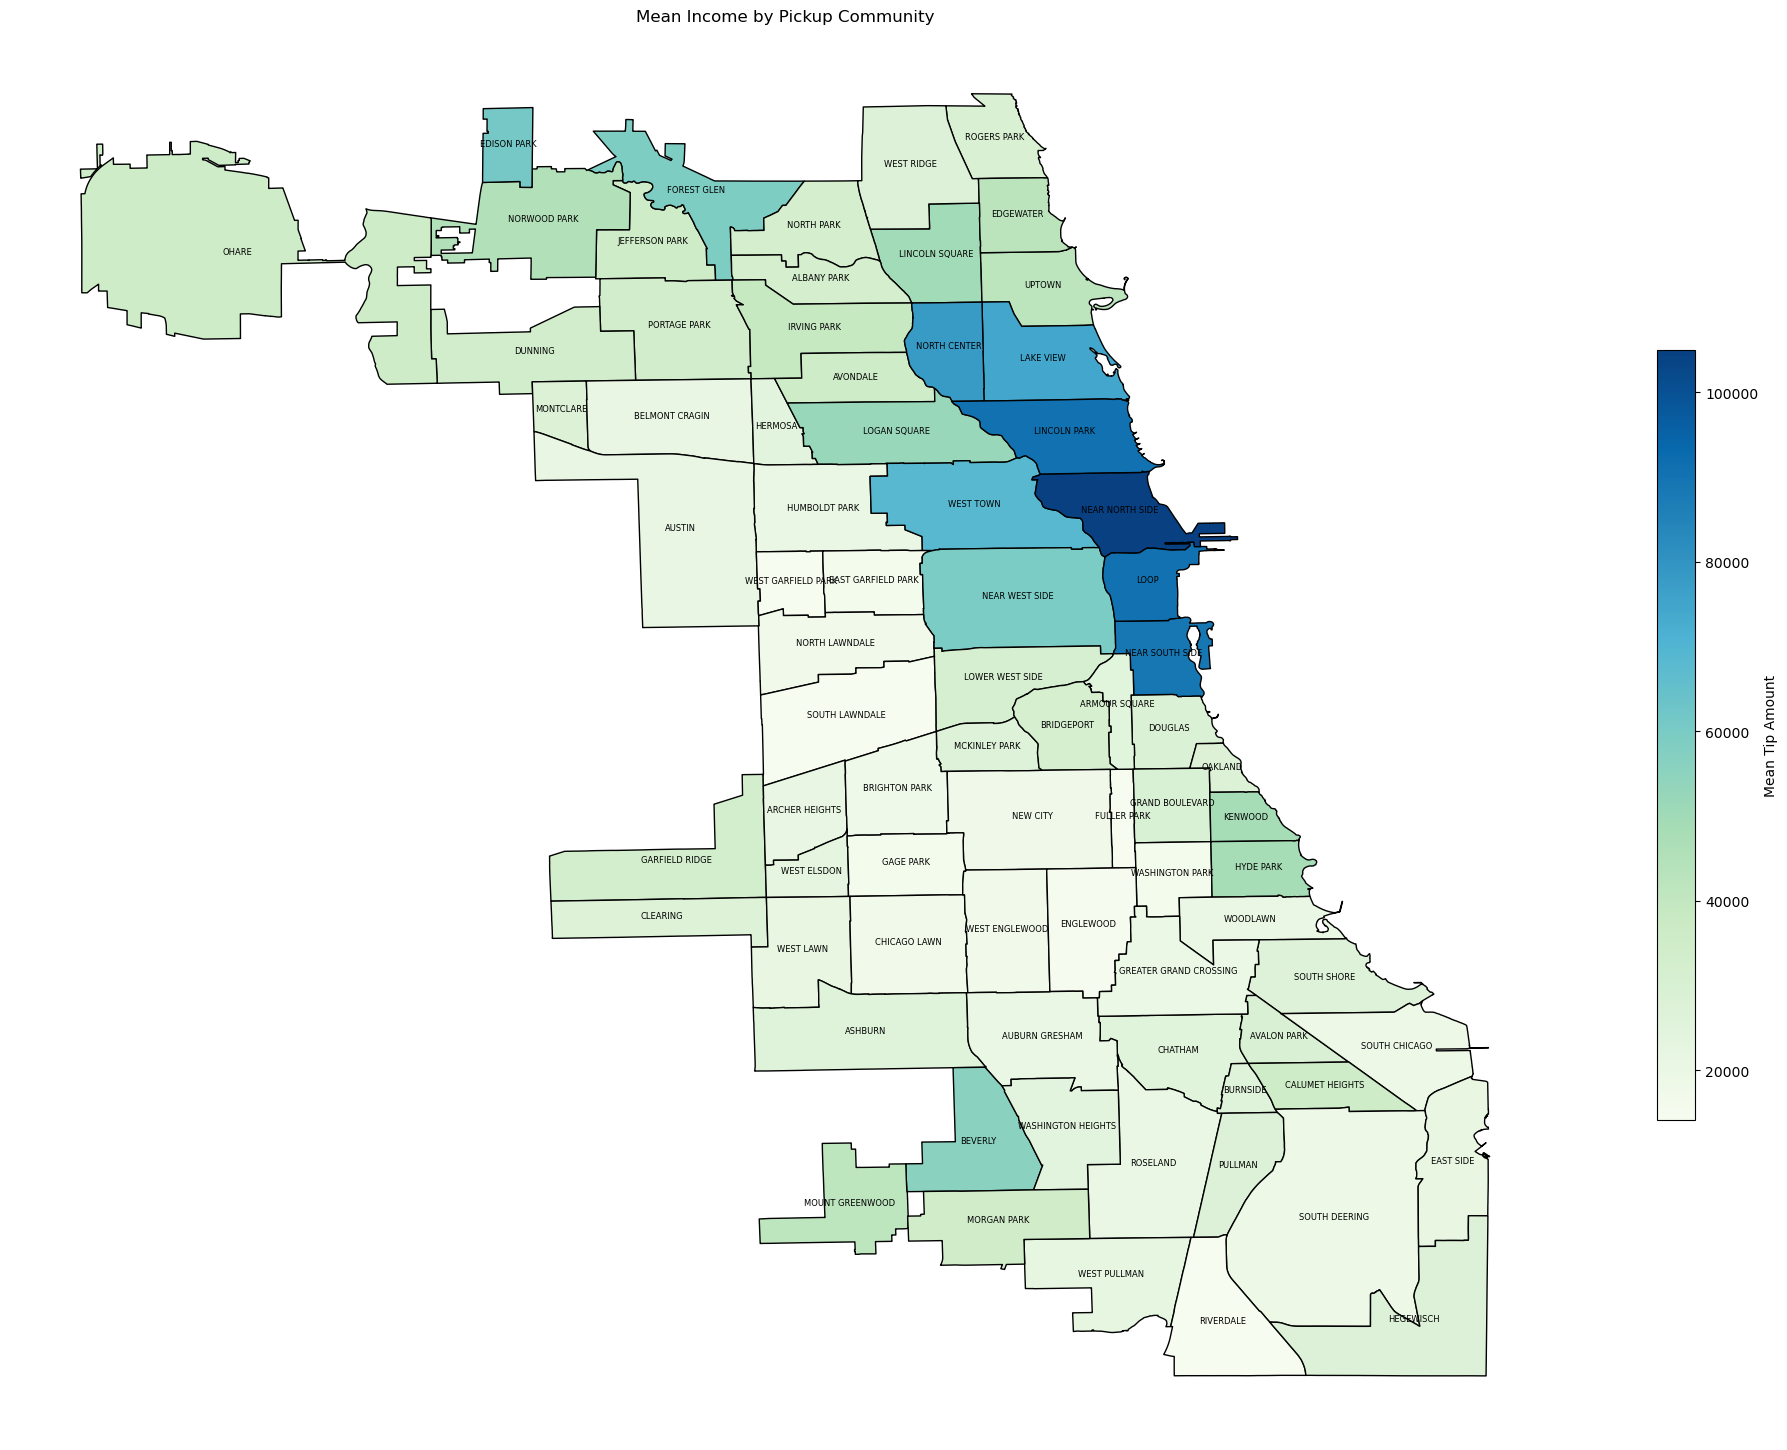

In [8]:
# group by community name and calculate the mean of tip
income_mean = df.groupby('Pickup Community Name')['IncomePickup'].mean().reset_index(name='mean_income')

income_mean['Pickup Community Name'] = income_mean['Pickup Community Name'].str.upper()

income_mean.loc[income_mean['Pickup Community Name'] == 'THE LOOP', 'Pickup Community Name'] = 'LOOP'
income_mean.loc[income_mean['Pickup Community Name'] == "O'HARE", 'Pickup Community Name'] = 'OHARE'

# merge the mean tip with the shapefile based on the community area name
map_df = chicago.merge(income_mean, left_on='community', right_on='Pickup Community Name')

# plot the map
fig, ax = plt.subplots(figsize=(25, 20))
map_df.plot(column='mean_income', cmap='GnBu', linewidth=1, ax=ax, edgecolor='0', legend=True, legend_kwds={
    'label': "Mean Tip Amount", 'orientation': "vertical", 'shrink': 0.5})

# add community names to the plot
for idx, row in map_df.iterrows():
    plt.annotate(text=row['community'], xy=row['geometry'].centroid.coords[0], ha='center', fontsize=6)
    
ax.axis('off')
ax.set_aspect('equal')
plt.title('Mean Income by Pickup Community')
plt.show()

# Dropoff

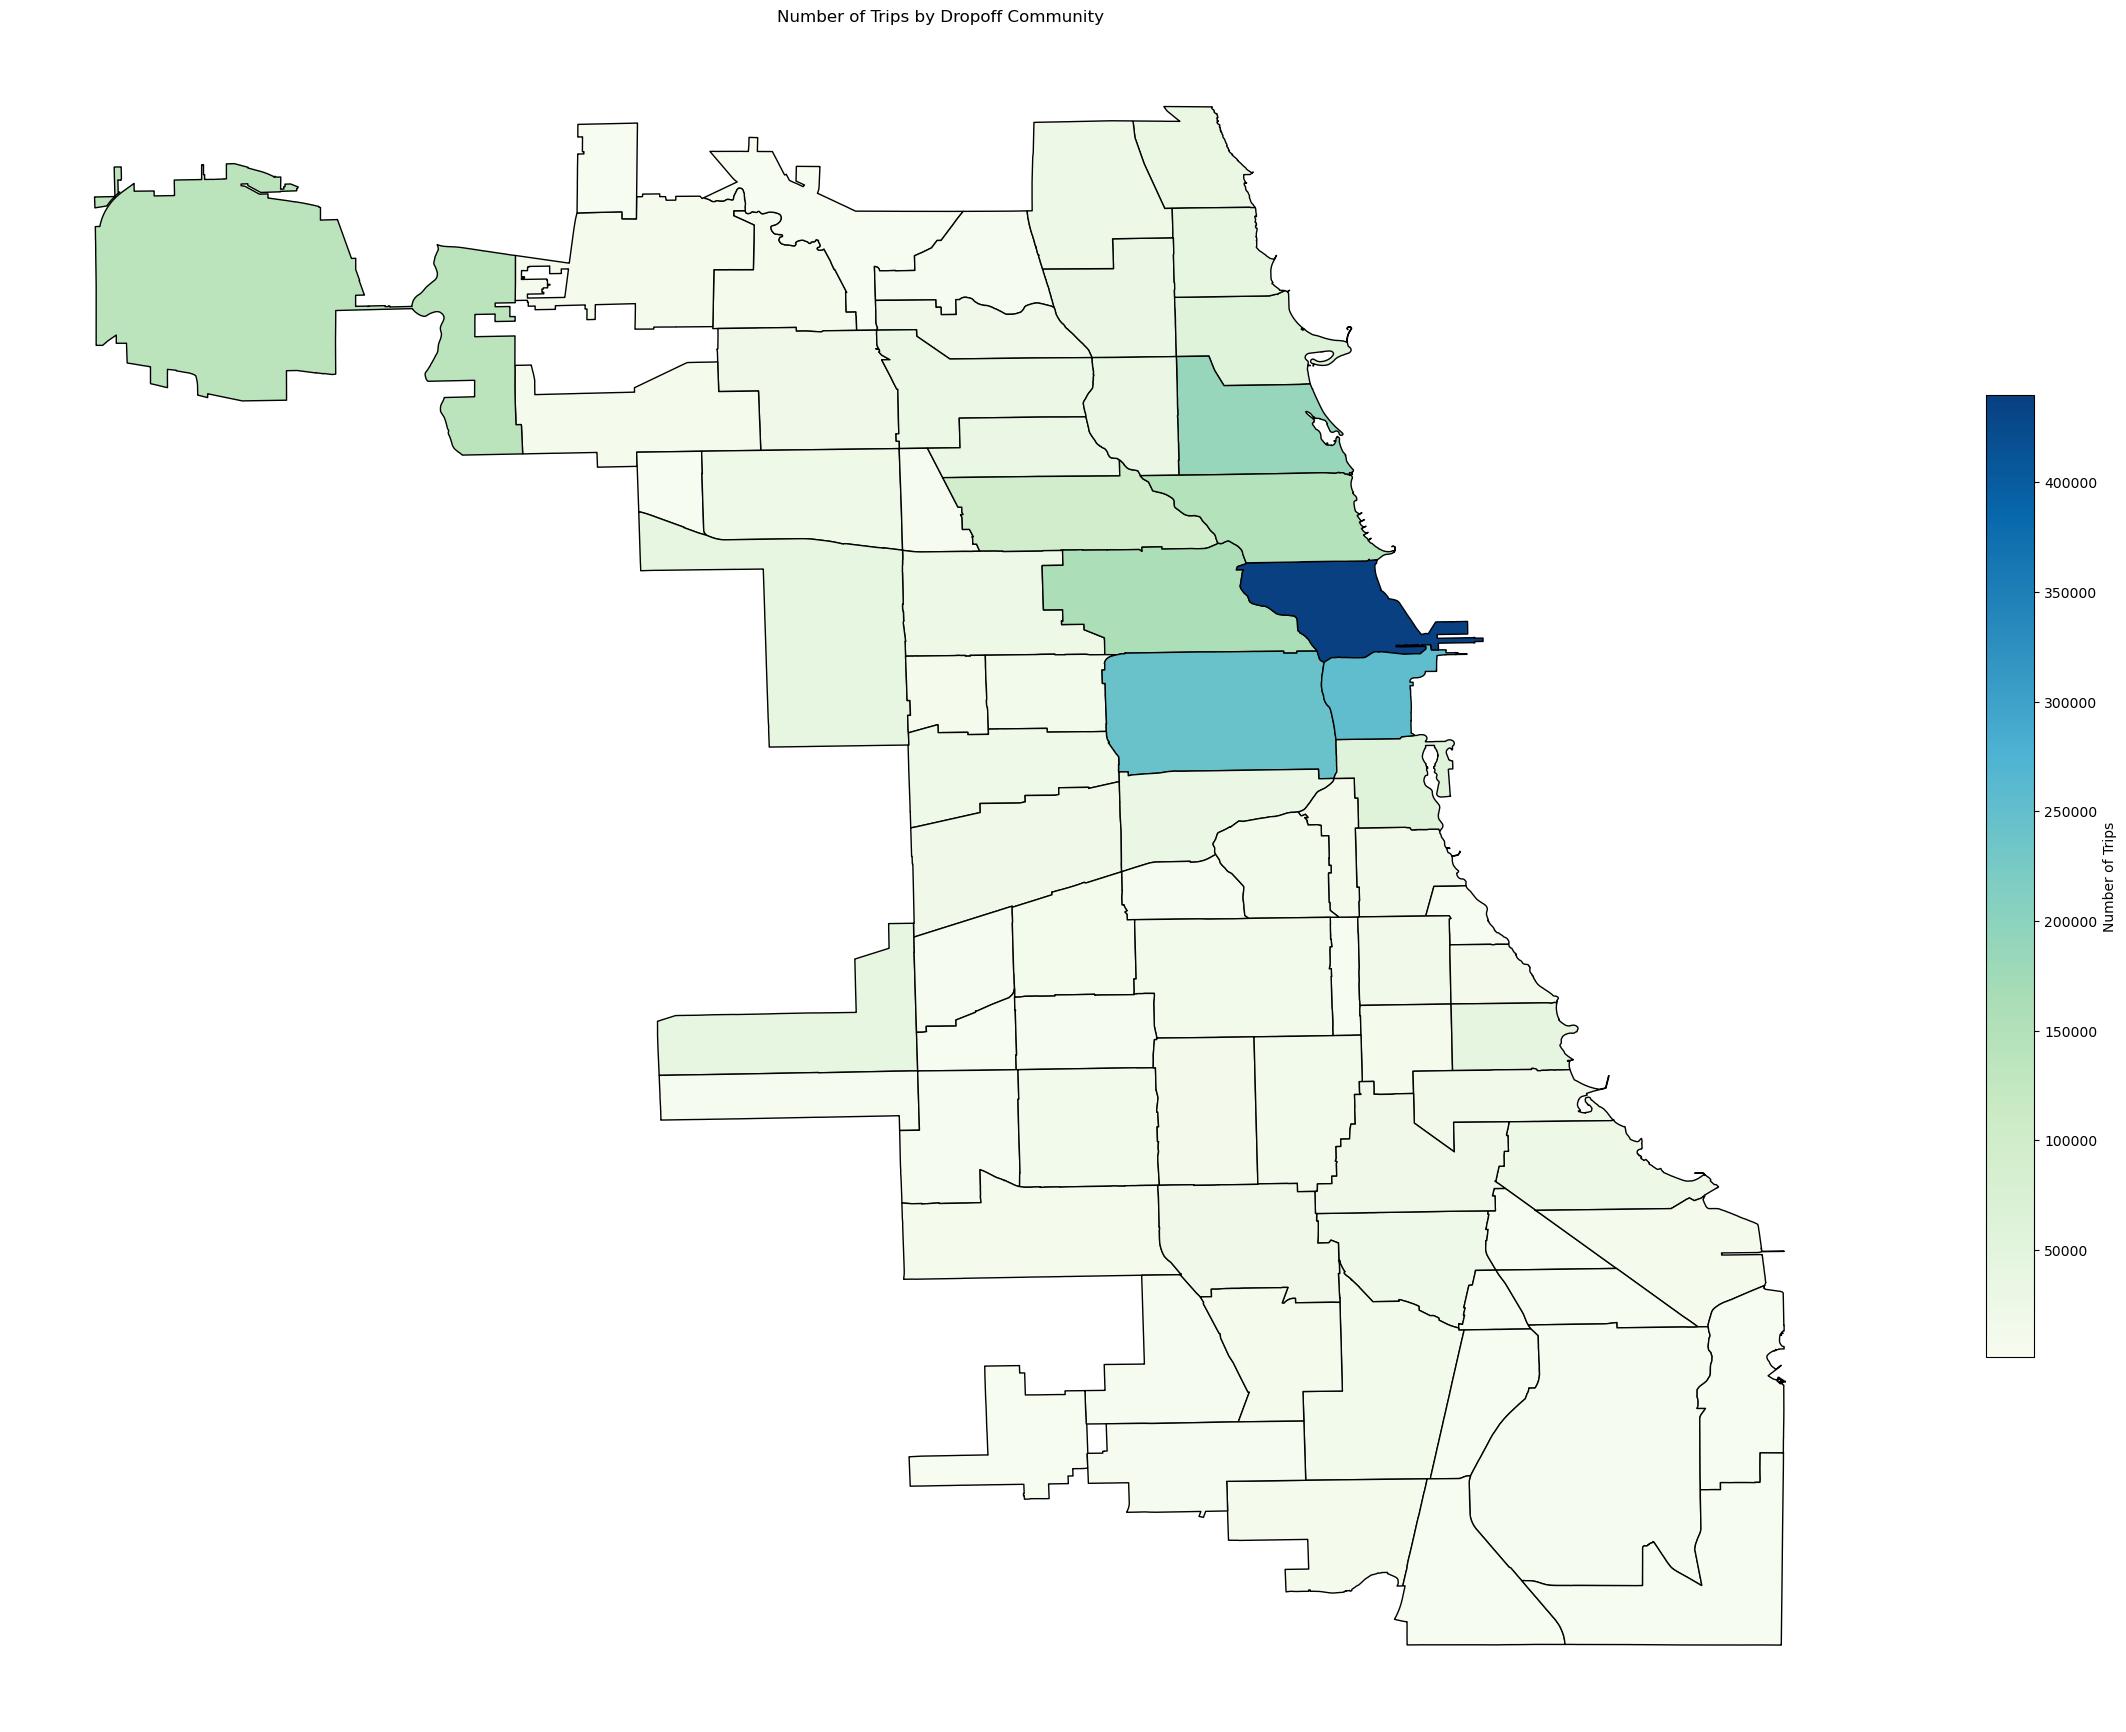

In [9]:
# group by Pickup Community Name and count the trips
counts = df.groupby('Dropoff Community Name').size().reset_index(name='count')

counts['Dropoff Community Name'] = counts['Dropoff Community Name'].str.upper()

counts.loc[counts['Dropoff Community Name'] == 'THE LOOP', 'Dropoff Community Name'] = 'LOOP'
counts.loc[counts['Dropoff Community Name'] == "O'HARE", 'Dropoff Community Name'] = 'OHARE'

# load the shapefile for Chicago community areas
chicago = gpd.read_file('geo_export_5c6812e1-58be-49dd-be9c-006ddc3ae094.shp')

# merge the counts with the shapefile based on the community area name
map_df = chicago.merge(counts, left_on='community', right_on='Dropoff Community Name')

# plot the map
fig, ax = plt.subplots(figsize=(30, 25))
map_df.plot(column='count', cmap='GnBu', linewidth=1, ax=ax, edgecolor='0', legend=True, legend_kwds={
    'label': "Number of Trips", 'orientation': "vertical", 'shrink': 0.5})

# # add community names to the plot
# for idx, row in map_df.iterrows():
#     plt.annotate(text=row['community'], xy=row['geometry'].centroid.coords[0], ha='center', fontsize=6)
    
ax.axis('off')
ax.set_aspect('equal')
plt.title('Number of Trips by Dropoff Community')
plt.show()


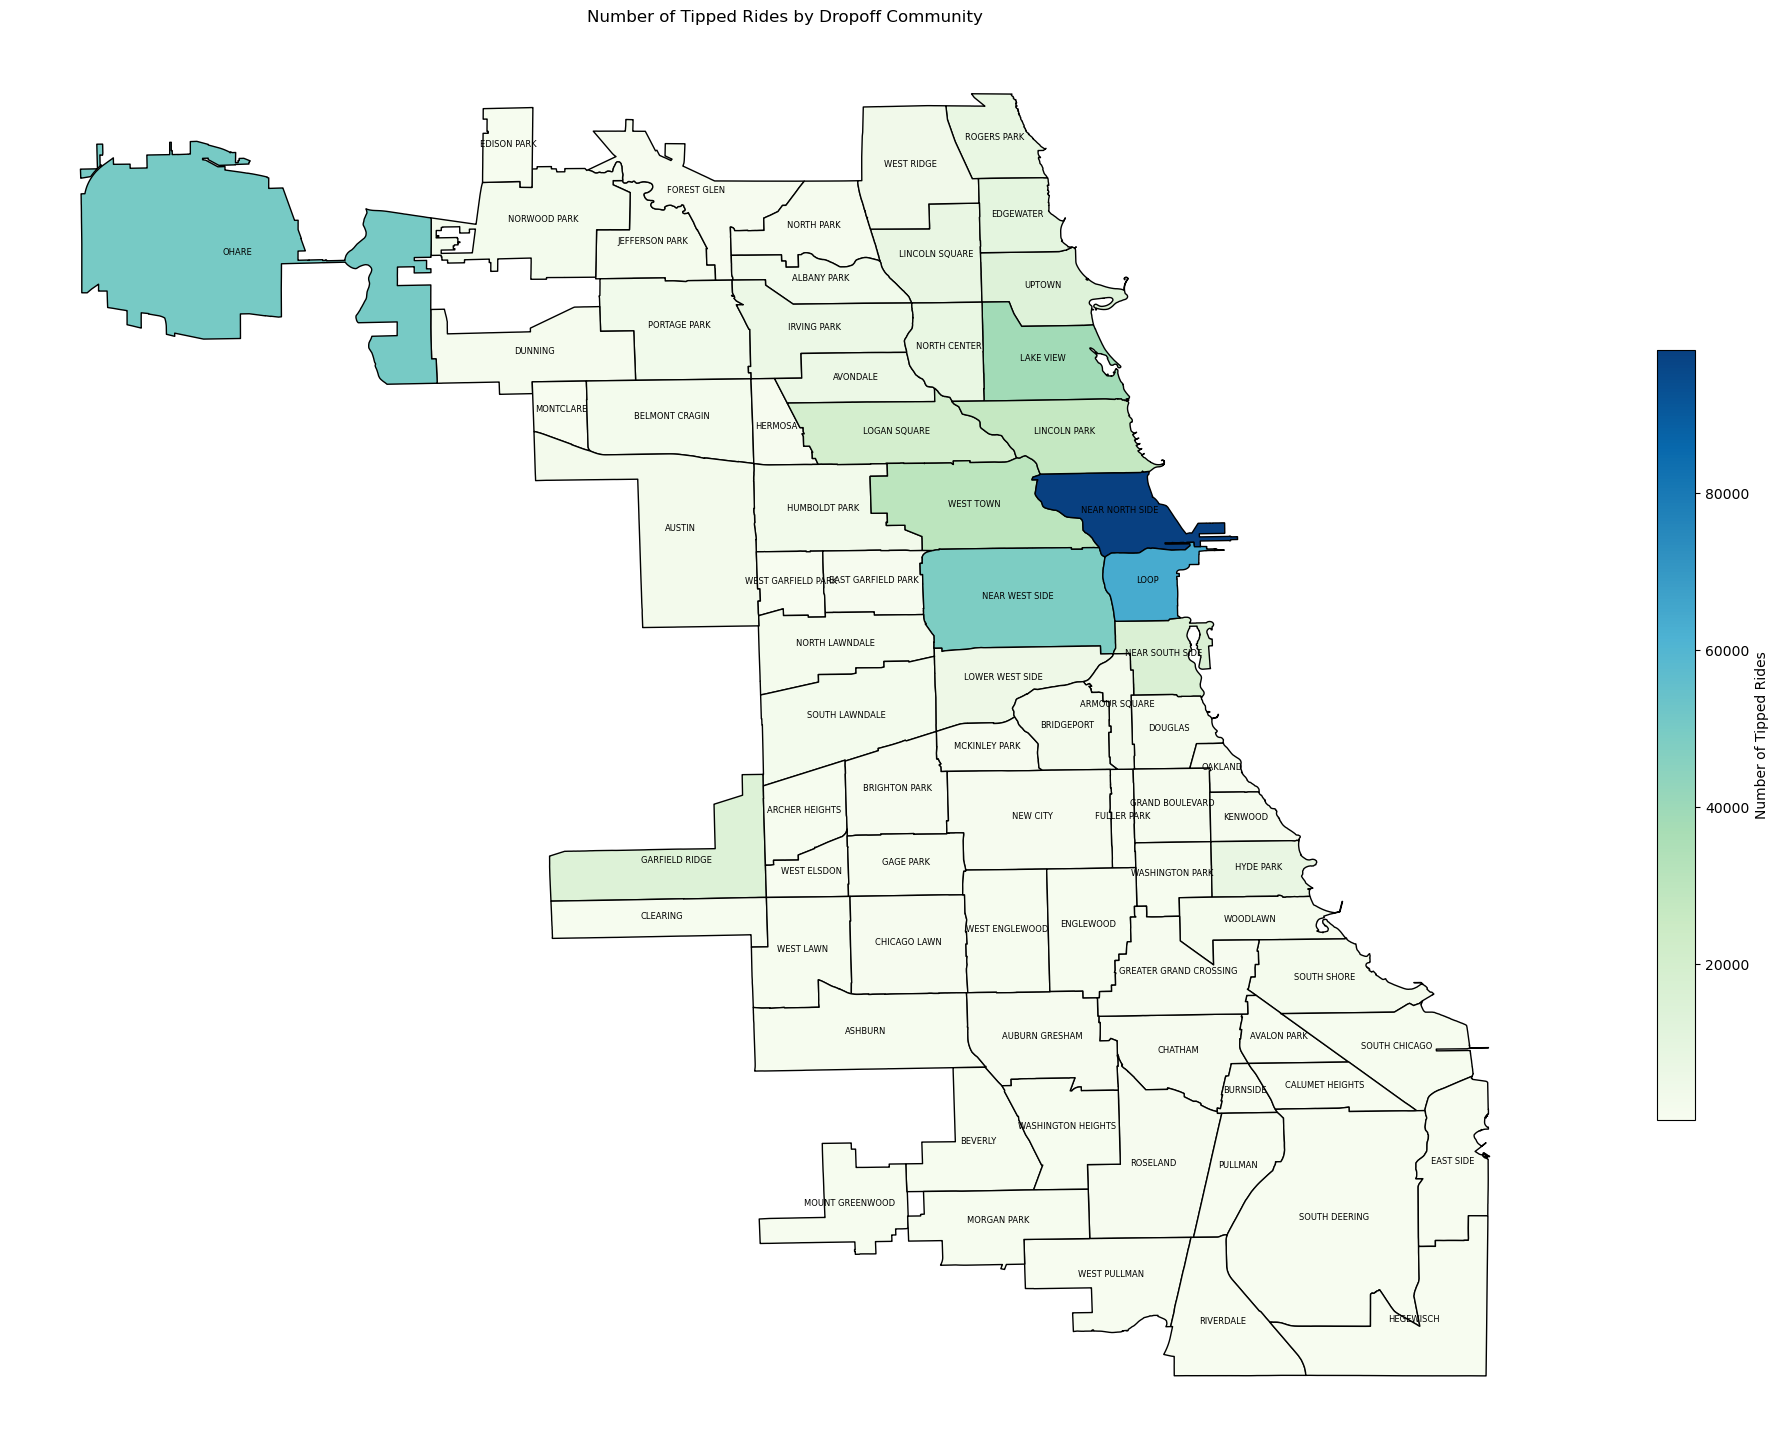

In [10]:
# group by Pickup Community Name and count the tipped rides
tipped_counts = df.groupby('Dropoff Community Name')['Tipped'].apply(lambda x: (x==True).sum()).reset_index(name='tipped_count')

tipped_counts['Dropoff Community Name'] = tipped_counts['Dropoff Community Name'].str.upper()

tipped_counts.loc[tipped_counts['Dropoff Community Name'] == 'THE LOOP', 'Dropoff Community Name'] = 'LOOP'
tipped_counts.loc[tipped_counts['Dropoff Community Name'] == "O'HARE", 'Dropoff Community Name'] = 'OHARE'

# merge the tipped counts with the shapefile based on the community area name
tipped_map_df = chicago.merge(tipped_counts, left_on='community', right_on='Dropoff Community Name')

# plot the map
fig, ax = plt.subplots(figsize=(25, 20))
tipped_map_df.plot(column='tipped_count', cmap='GnBu', linewidth=1, ax=ax, edgecolor='0', legend=True, legend_kwds={
    'label': "Number of Tipped Rides", 'orientation': "vertical", 'shrink': 0.5})

# add community names to the plot
for idx, row in tipped_map_df.iterrows():
    plt.annotate(text=row['community'], xy=row['geometry'].centroid.coords[0], ha='center', fontsize=6)

ax.axis('off')
ax.set_aspect('equal')
plt.title('Number of Tipped Rides by Dropoff Community')
plt.show()

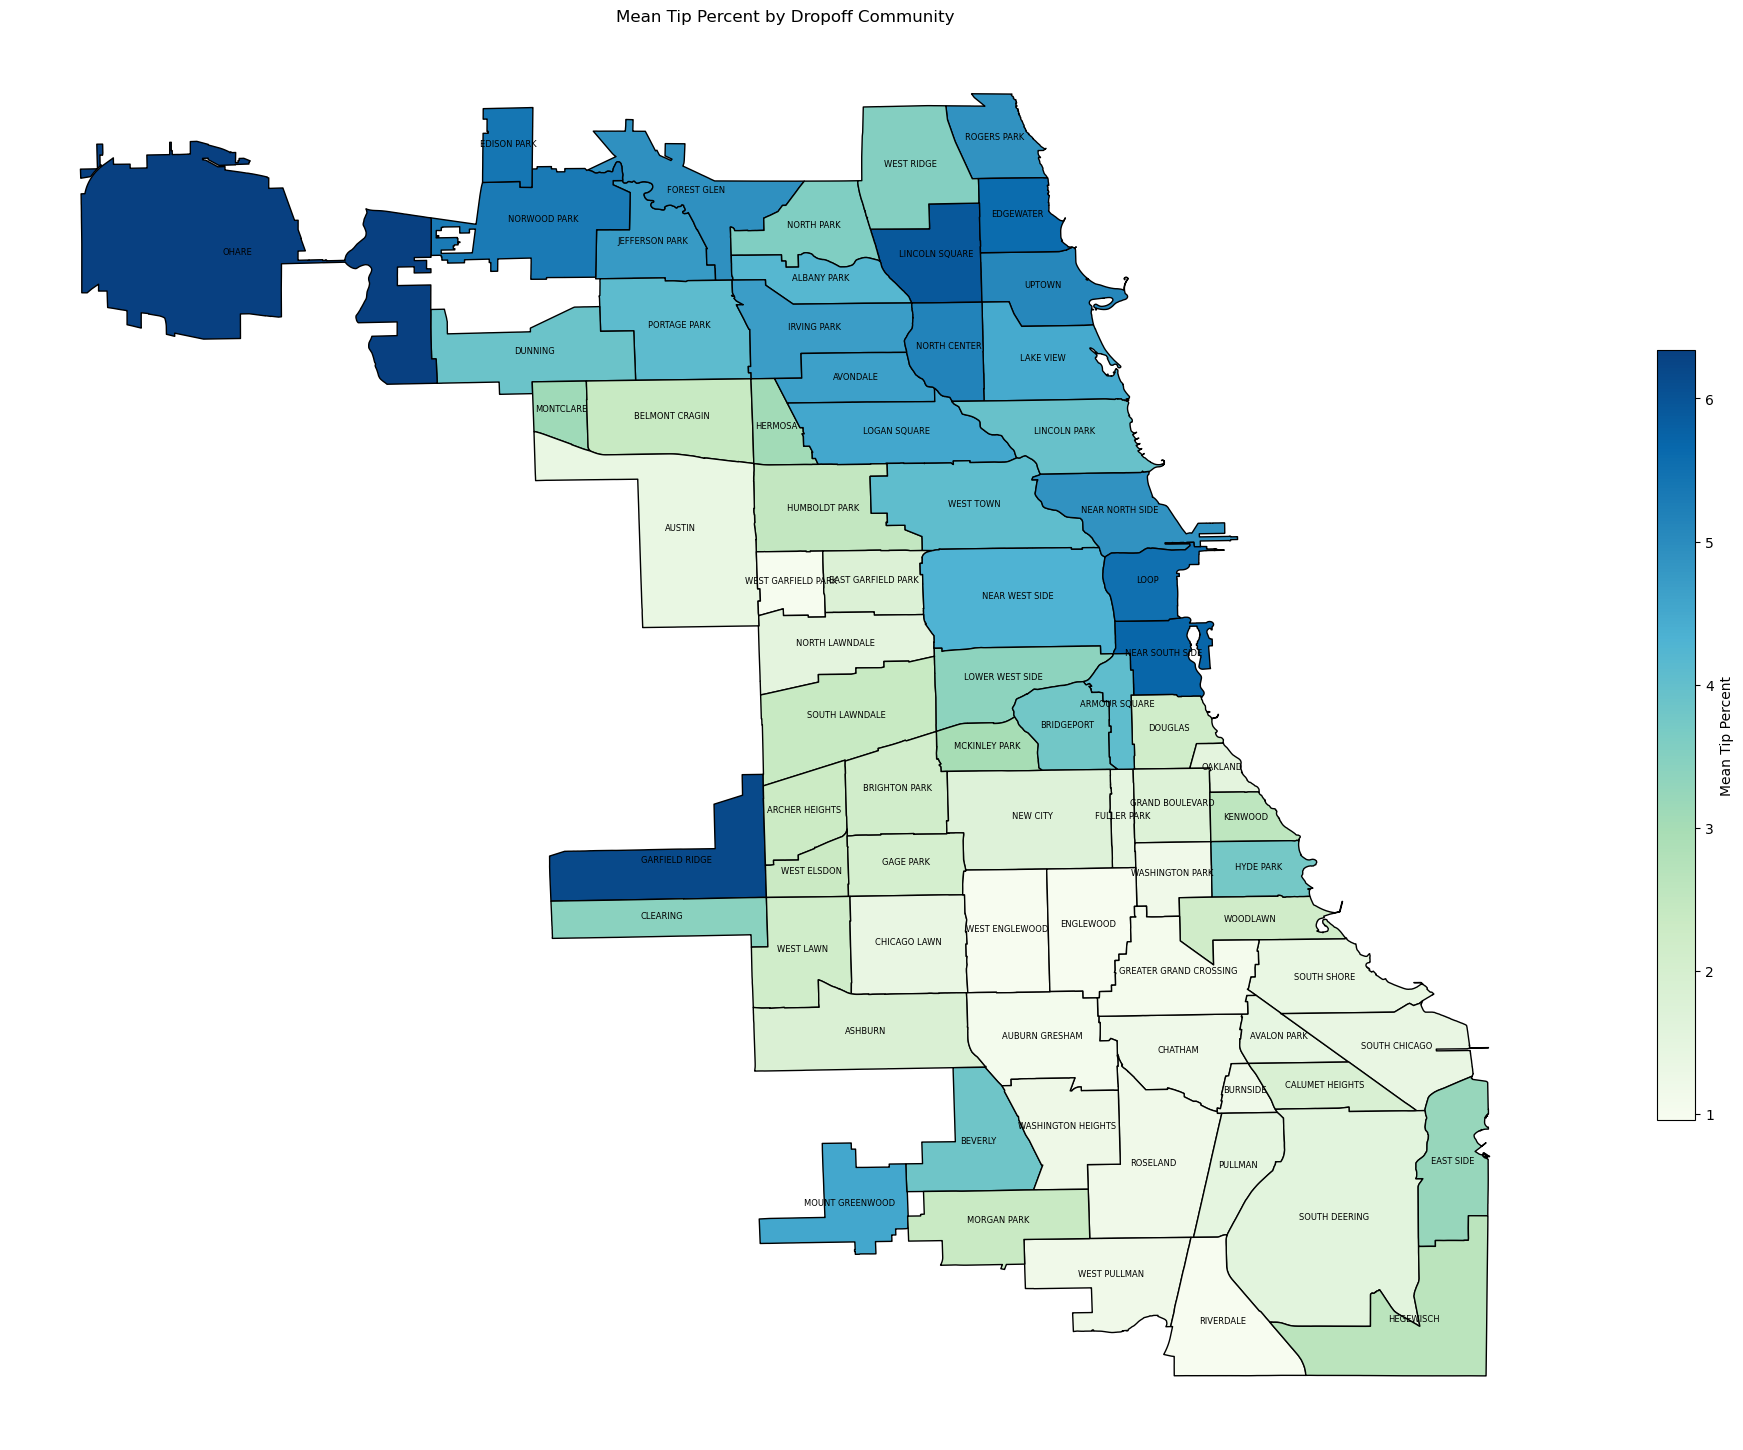

In [11]:
# group by community name and calculate the mean of tip
tip_mean_percent = df.groupby('Dropoff Community Name')['Tip_percent_PerRide'].mean().reset_index(name='mean_tip_percent')

tip_mean_percent['Dropoff Community Name'] = tip_mean_percent['Dropoff Community Name'].str.upper()

tip_mean_percent.loc[tip_mean_percent['Dropoff Community Name'] == 'THE LOOP', 'Dropoff Community Name'] = 'LOOP'
tip_mean_percent.loc[tip_mean_percent['Dropoff Community Name'] == "O'HARE", 'Dropoff Community Name'] = 'OHARE'

# merge the mean tip with the shapefile based on the community area name
map_df = chicago.merge(tip_mean_percent, left_on='community', right_on='Dropoff Community Name')

# plot the map
fig, ax = plt.subplots(figsize=(25, 20))
map_df.plot(column='mean_tip_percent', cmap='GnBu', linewidth=1, ax=ax, edgecolor='0', legend=True, legend_kwds={
    'label': "Mean Tip Percent", 'orientation': "vertical", 'shrink': 0.5})

# add community names to the plot
for idx, row in map_df.iterrows():
    plt.annotate(text=row['community'], xy=row['geometry'].centroid.coords[0], ha='center', fontsize=6)
    
ax.axis('off')
ax.set_aspect('equal')
plt.title('Mean Tip Percent by Dropoff Community')
plt.show()

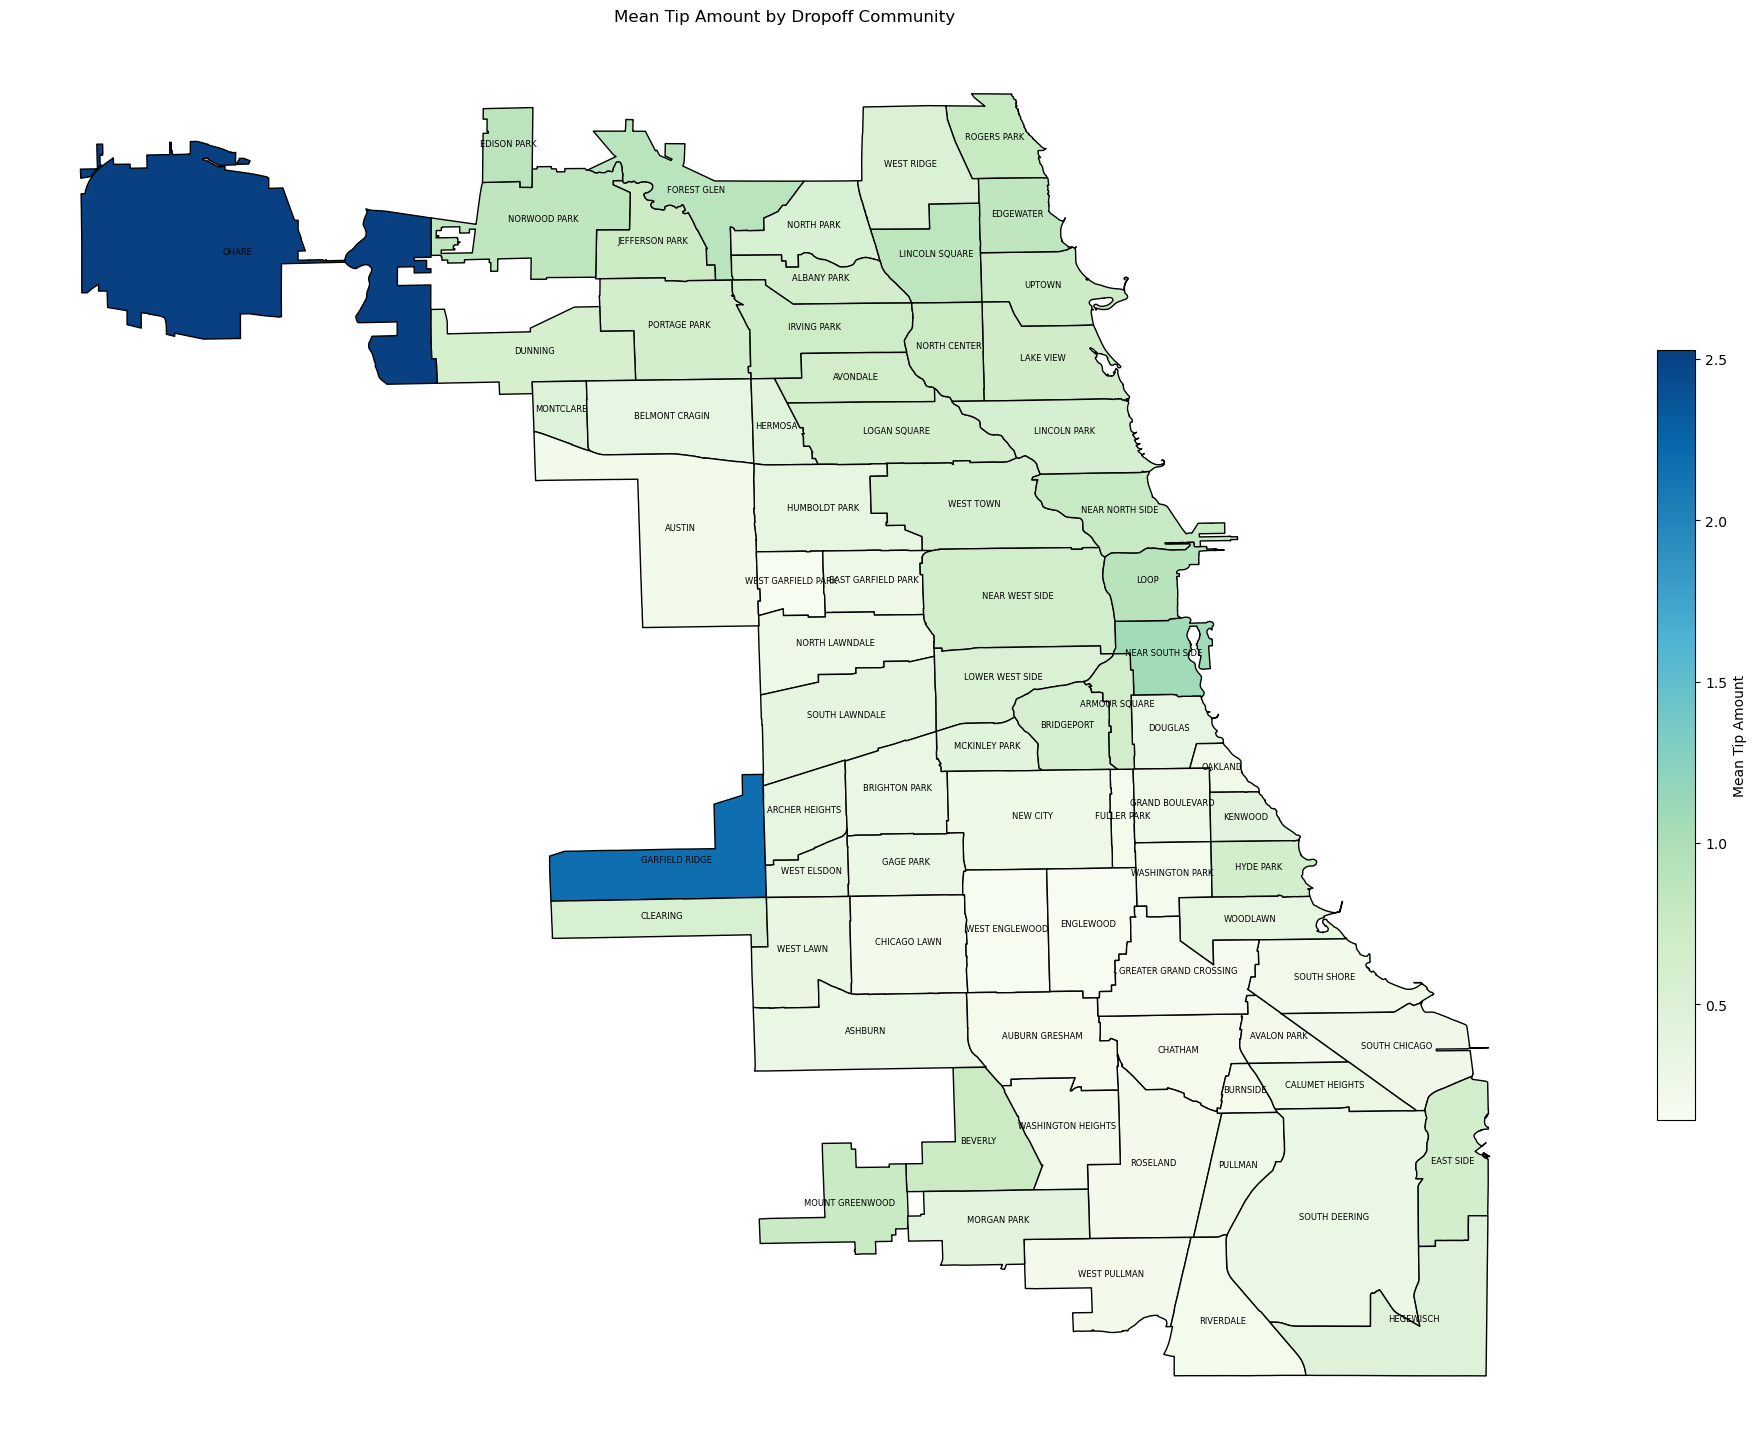

In [12]:
# group by community name and calculate the mean of tip
tip_mean = df.groupby('Dropoff Community Name')['Tip'].mean().reset_index(name='mean_tip')

tip_mean['Dropoff Community Name'] = tip_mean['Dropoff Community Name'].str.upper()

tip_mean.loc[tip_mean['Dropoff Community Name'] == 'THE LOOP', 'Dropoff Community Name'] = 'LOOP'
tip_mean.loc[tip_mean['Dropoff Community Name'] == "O'HARE", 'Dropoff Community Name'] = 'OHARE'

# merge the mean tip with the shapefile based on the community area name
map_df = chicago.merge(tip_mean, left_on='community', right_on='Dropoff Community Name')

# plot the map
fig, ax = plt.subplots(figsize=(25, 20))
map_df.plot(column='mean_tip', cmap='GnBu', linewidth=1, ax=ax, edgecolor='0', legend=True, legend_kwds={
    'label': "Mean Tip Amount", 'orientation': "vertical", 'shrink': 0.5})

# add community names to the plot
for idx, row in map_df.iterrows():
    plt.annotate(text=row['community'], xy=row['geometry'].centroid.coords[0], ha='center', fontsize=6)
    
ax.axis('off')
ax.set_aspect('equal')
plt.title('Mean Tip Amount by Dropoff Community')
plt.show()

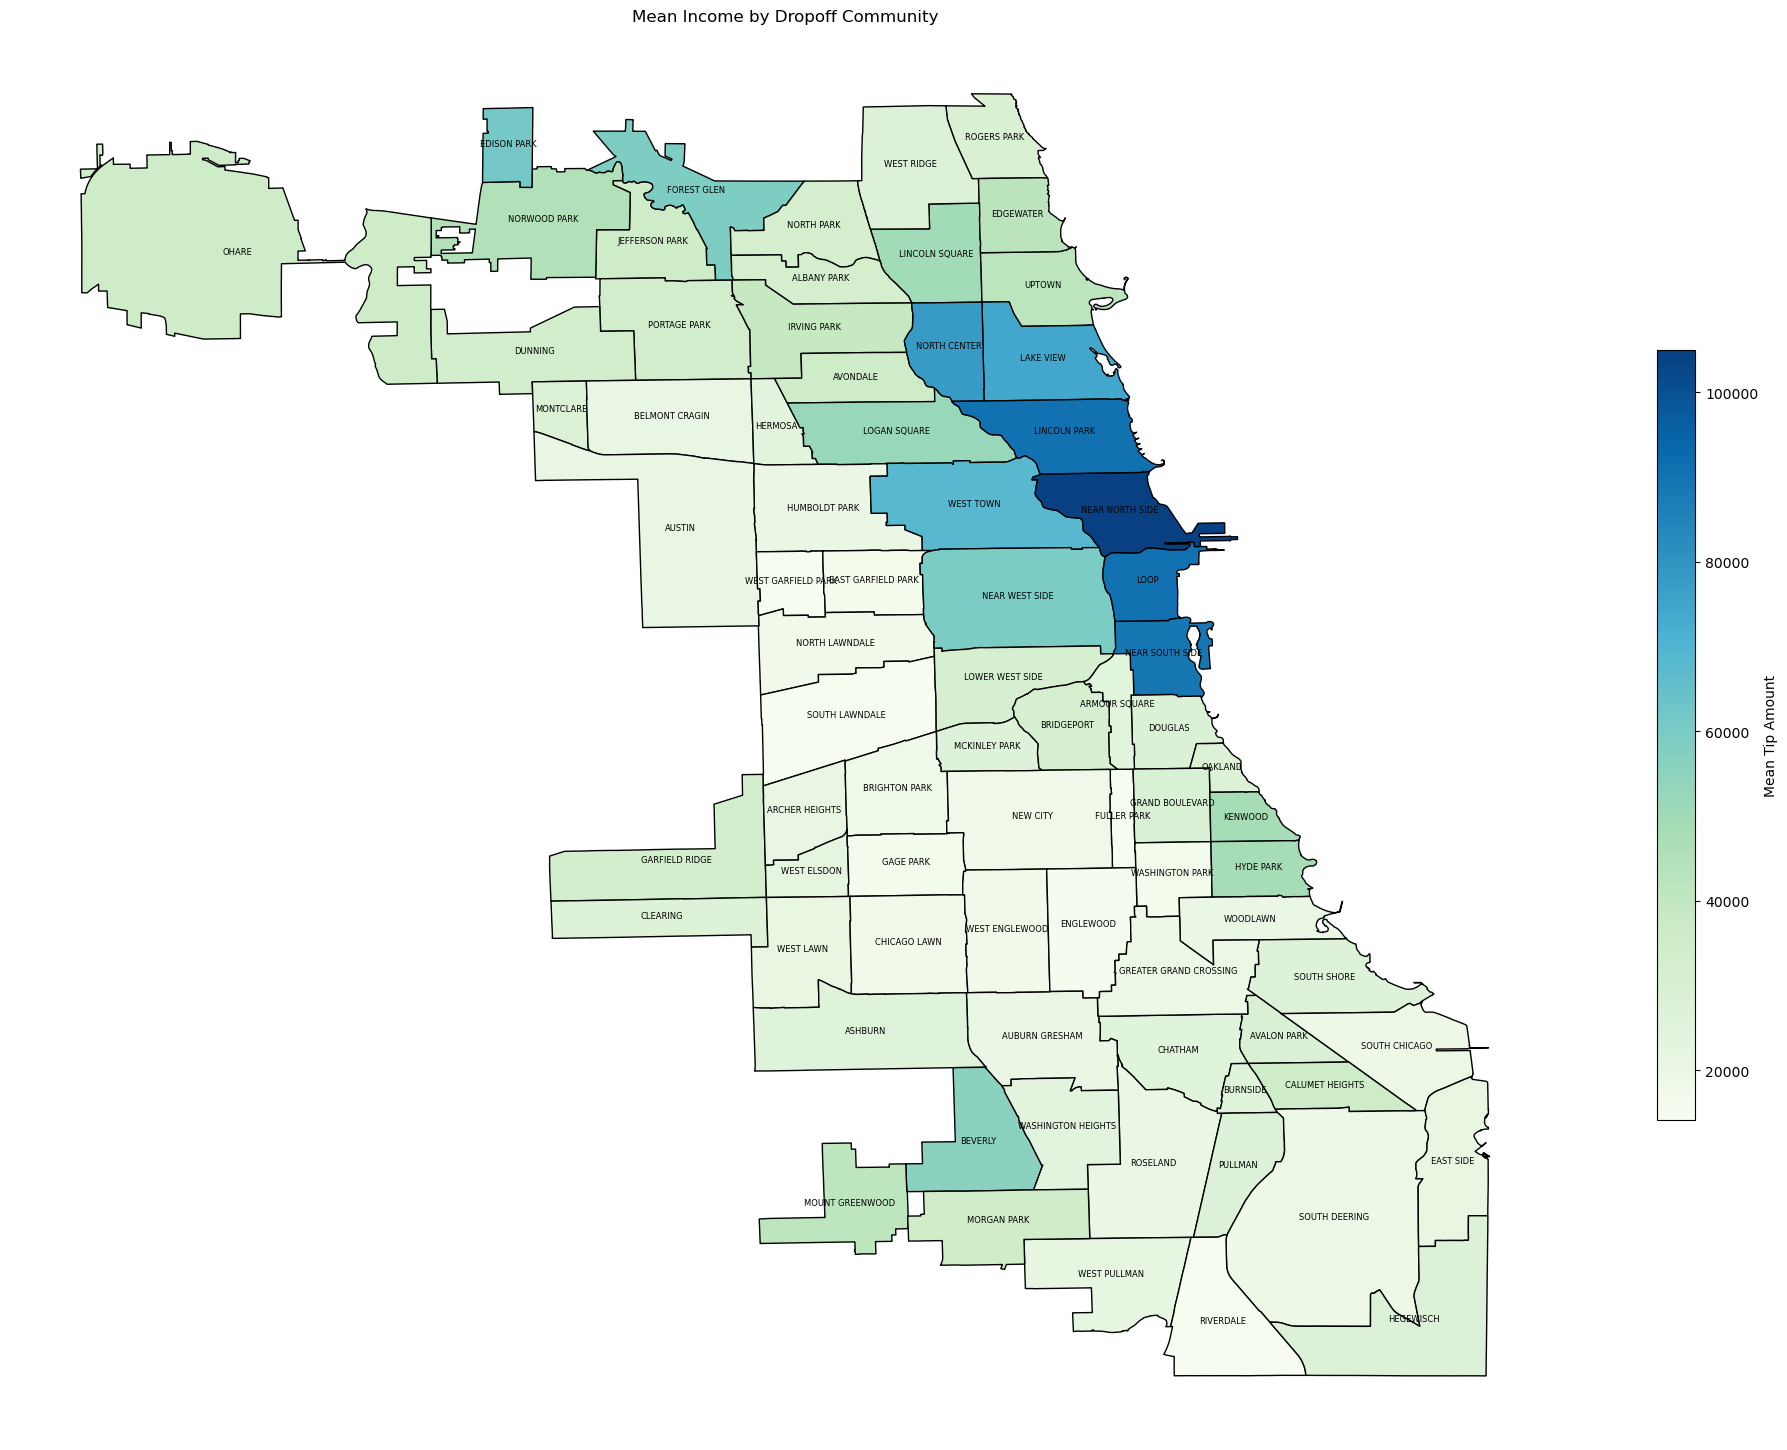

In [13]:
# group by community name and calculate the mean of tip
income_mean = df.groupby('Dropoff Community Name')['IncomeDropoff'].mean().reset_index(name='mean_income')

income_mean['Dropoff Community Name'] = income_mean['Dropoff Community Name'].str.upper()

income_mean.loc[income_mean['Dropoff Community Name'] == 'THE LOOP', 'Dropoff Community Name'] = 'LOOP'
income_mean.loc[income_mean['Dropoff Community Name'] == "O'HARE", 'Dropoff Community Name'] = 'OHARE'

# merge the mean tip with the shapefile based on the community area name
map_df = chicago.merge(income_mean, left_on='community', right_on='Dropoff Community Name')

# plot the map
fig, ax = plt.subplots(figsize=(25, 20))
map_df.plot(column='mean_income', cmap='GnBu', linewidth=1, ax=ax, edgecolor='0', legend=True, legend_kwds={
    'label': "Mean Tip Amount", 'orientation': "vertical", 'shrink': 0.5})

# add community names to the plot
for idx, row in map_df.iterrows():
    plt.annotate(text=row['community'], xy=row['geometry'].centroid.coords[0], ha='center', fontsize=6)
    
ax.axis('off')
ax.set_aspect('equal')
plt.title('Mean Income by Dropoff Community')
plt.show()

### Tipping as per traffic level (Used proxy of miles/time for traffic condition)

1. Considering Average speed as 36 mph (0.001 miles per second)
3. Above 50 mph is considered light to no traffic
2. Removed entries with speed greater than 144 mph

In [14]:
df['traffic_condition_interval2'] = pd.cut(df['traffic_condition'], 
                            bins=[ 0, 0.0025, 0.005, 0.0085, 0.0140, max(df['traffic_condition'])],
                             labels=["Very high traffic", "high traffic", "high-avg traffic", "avg traffic", 
                                     "light-no traffic"])

In [15]:
df['Date2'] = pd.to_datetime(df['Date'])

df['preCovid'] = (df['Date2'] < pd.to_datetime('2020-03-06')).astype(int)
df['Covid'] = ((df['Date2'] >= pd.to_datetime('2020-03-06')) & (df['Date2'] < pd.to_datetime('2020-07-01'))).astype(int)
df['postCovid_initial'] = ((df['Date2'] >= pd.to_datetime('2020-07-01')) & (df['Date2'] < pd.to_datetime('2021-07-01'))).astype(int)
df['postCovid_recent'] = (df['Date2'] >= pd.to_datetime('2021-07-01')).astype(int)

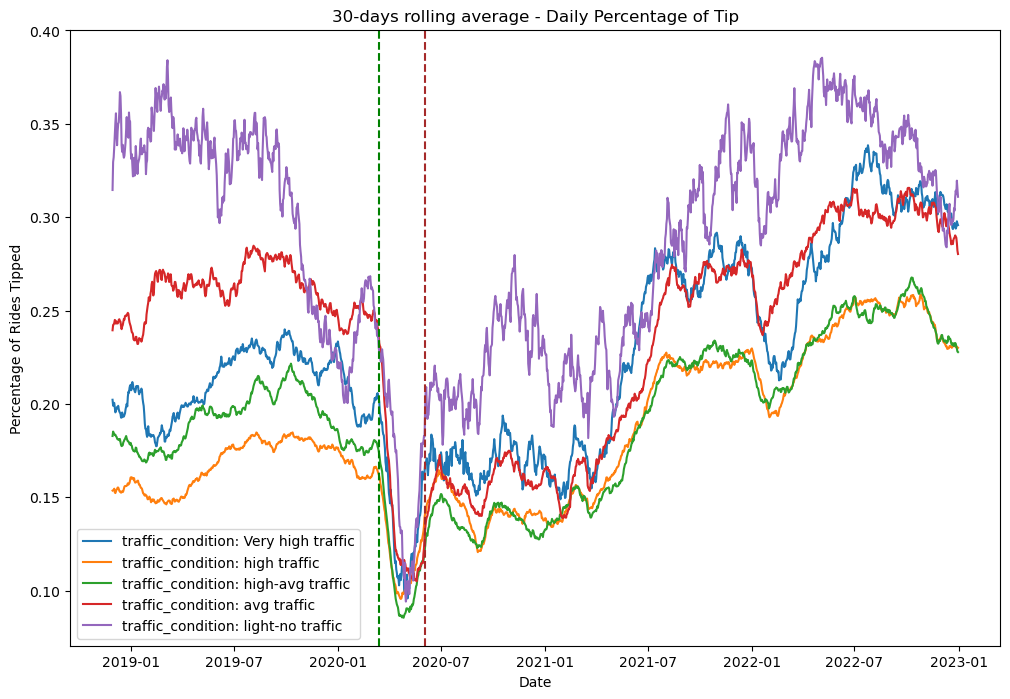

In [16]:
# Non rolling average plot
# Rolling average of tip percentage
plt.figure(figsize=(12, 8))

traff_cond = ['Very high traffic', 'high traffic', 'high-avg traffic', 'avg traffic', 'light-no traffic']

for i in traff_cond: 
    grouped_mean = df[df['traffic_condition_interval2'] == i].groupby([df.Date2]).mean()
    rolling_avg = grouped_mean.rolling(window=30).mean()
    plt.plot(rolling_avg.index, rolling_avg['Tipped'], label = f'traffic_condition: {i}')

plt.xlabel('Date')
plt.ylabel('Percentage of Rides Tipped')
plt.title('30-days rolling average - Daily Percentage of Tip')
plt.legend()

# Some events (to discuss)
# National Emergency
plt.axvline(pd.to_datetime('03/13/2020', format='%m/%d/%Y'), color='g', linestyle='--')

# https://chicago.suntimes.com/coronavirus/2020/5/28/21273554/coronvirus-chicago-reopening-businesses-restaurants-pandemic-rules-lightfoot
plt.axvline(pd.to_datetime('06/3/2020', format='%m/%d/%Y'), color='brown', linestyle='--')

Text(2020-06-13 00:00:00, 4.5, 'Chicago COVID-19 Reopening')

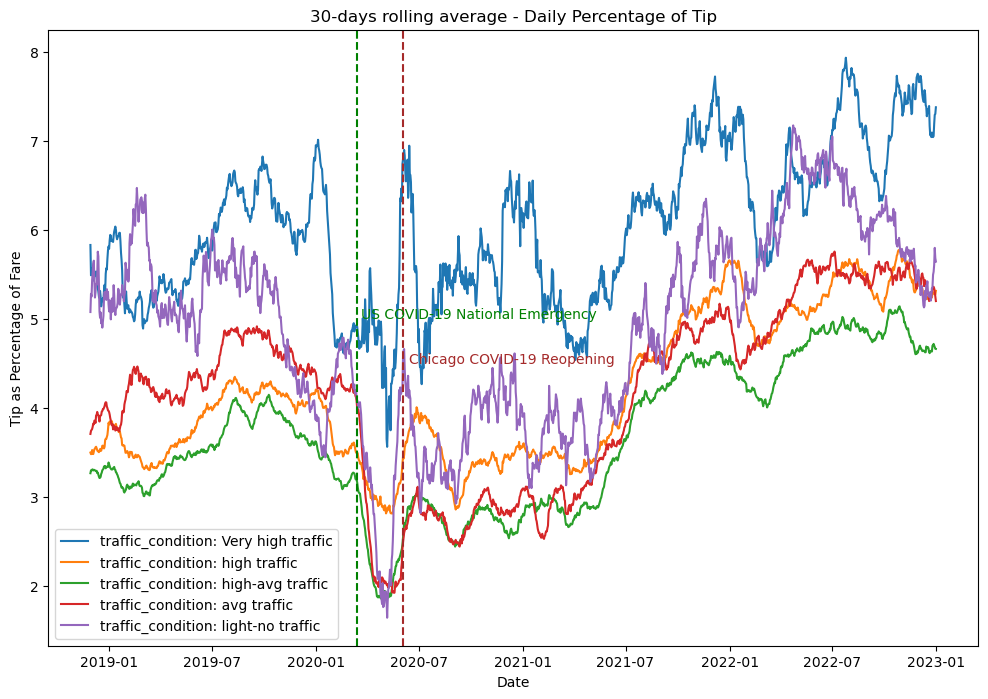

In [17]:
# Non rolling average plot
# Rolling average of tip as Percentage of Fare
plt.figure(figsize=(12, 8))

traff_cond = ['Very high traffic', 'high traffic', 'high-avg traffic', 'avg traffic', 'light-no traffic']

for i in traff_cond: 
    grouped_mean = df[df['traffic_condition_interval2'] == i].groupby([df.Date2]).mean()
    rolling_avg = grouped_mean.rolling(window=30).mean()
    plt.plot(rolling_avg.index, rolling_avg['Tip_percent_PerRide'], label = f'traffic_condition: {i}')

plt.xlabel('Date')
plt.ylabel('Tip as Percentage of Fare')
plt.title('30-days rolling average - Daily Percentage of Tip')
plt.legend()


# Some events (to discuss)
# National Emergency
plt.axvline(pd.to_datetime('03/13/2020', format='%m/%d/%Y'), color='g', linestyle='--')
plt.text(pd.to_datetime('03/20/2020', format='%m/%d/%Y'), 5, 'US COVID-19 National Emergency', color = 'g' )

# https://chicago.suntimes.com/coronavirus/2020/5/28/21273554/coronvirus-chicago-reopening-businesses-restaurants-pandemic-rules-lightfoot
plt.axvline(pd.to_datetime('06/3/2020', format='%m/%d/%Y'), color='brown', linestyle='--')
plt.text(pd.to_datetime('06/13/2020', format='%m/%d/%Y'), 4.5, 'Chicago COVID-19 Reopening', color = 'brown' )

Text(2020-06-13 00:00:00, 4.5, 'Chicago COVID-19 Reopening')

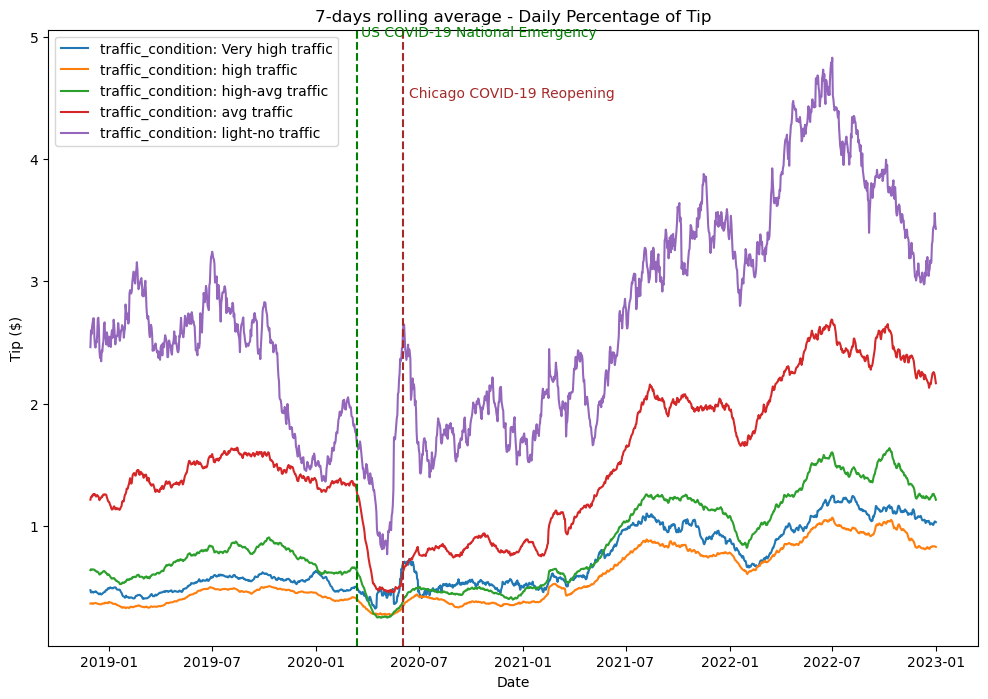

In [18]:
# Ammount of tip instead of percentage:
# Rolling average plot
# Rolling average of tip amount
plt.figure(figsize=(12, 8))

traff_cond = ['Very high traffic', 'high traffic', 'high-avg traffic', 'avg traffic', 'light-no traffic']

for i in traff_cond: 
    grouped_mean = df[df['traffic_condition_interval2'] == i].groupby([df.Date2]).mean()
    rolling_avg = grouped_mean.rolling(window=30).mean()
    plt.plot(rolling_avg.index, rolling_avg['Tip'], label = f'traffic_condition: {i}')

plt.xlabel('Date')
plt.ylabel('Tip ($)')
plt.title('7-days rolling average - Daily Percentage of Tip')
plt.legend()


# Some events (to discuss)
# National Emergency
plt.axvline(pd.to_datetime('03/13/2020', format='%m/%d/%Y'), color='g', linestyle='--')
plt.text(pd.to_datetime('03/20/2020', format='%m/%d/%Y'), 5, 'US COVID-19 National Emergency', color = 'g' )

# https://chicago.suntimes.com/coronavirus/2020/5/28/21273554/coronvirus-chicago-reopening-businesses-restaurants-pandemic-rules-lightfoot
plt.axvline(pd.to_datetime('06/3/2020', format='%m/%d/%Y'), color='brown', linestyle='--')
plt.text(pd.to_datetime('06/13/2020', format='%m/%d/%Y'), 4.5, 'Chicago COVID-19 Reopening', color = 'brown' )

### Statistical tests on the traffic conditions

In [19]:
import statsmodels.stats.proportion as smprop

# Define a list of categories to loop through
traff_cond_list = df['traffic_condition_interval2'].unique().tolist()

# Define a function to perform the test for a given category
def test_category(category):
    pre_covid_prop = df.loc[(df['traffic_condition_interval2'] == category) & (df['preCovid'] == 1), 'Tip'].mean()
    post_covid_prop = df.loc[(df['traffic_condition_interval2'] == category) & (df['postCovid_recent'] == 1), 'Tip'].mean()
    n1 = len(df.loc[(df['traffic_condition_interval2'] == category) & (df['preCovid'] == 1)])
    n2 = len(df.loc[(df['traffic_condition_interval2'] == category) & (df['postCovid_recent'] == 1)])
    prop_diff = post_covid_prop - pre_covid_prop
    prop_diff_se = smprop.proportions_ztest([post_covid_prop*n2, pre_covid_prop*n1], [n2, n1])[1]
    return {'Category': category, 'Pre-COVID proportion': pre_covid_prop, 'Post-COVID-recent proportion': post_covid_prop, 'Proportion difference': prop_diff, 'p-value': prop_diff_se}

# Loop through the categories and apply the test to each
test_results_tip = []

for category in traff_cond_list:
    test_results_tip.append(test_category(category))
    
    test = test_category(category)
    
    if test['p-value'] < 0.05:
        print(f'For Category {test["Category"]}, the difference in the proportion of riders who tipped Pre-COVID and Post-COVID-recent is statistically significant at 95% confidence interval')
    else:
        print(f'For Category {test["Category"]}, the difference in the proportion of riders who tipped Pre-COVID and Post-COVID-recent is statistically insignificant at 95% confidence interval')

For Category high-avg traffic, the difference in the proportion of riders who tipped Pre-COVID and Post-COVID-recent is statistically significant at 95% confidence interval
For Category avg traffic, the difference in the proportion of riders who tipped Pre-COVID and Post-COVID-recent is statistically insignificant at 95% confidence interval
For Category high traffic, the difference in the proportion of riders who tipped Pre-COVID and Post-COVID-recent is statistically significant at 95% confidence interval
For Category Very high traffic, the difference in the proportion of riders who tipped Pre-COVID and Post-COVID-recent is statistically significant at 95% confidence interval
For Category light-no traffic, the difference in the proportion of riders who tipped Pre-COVID and Post-COVID-recent is statistically insignificant at 95% confidence interval


In [20]:
test_results_tip

[{'Category': 'high-avg traffic',
  'Pre-COVID proportion': 0.7029220133293544,
  'Post-COVID-recent proportion': 1.283948573064677,
  'Proportion difference': 0.5810265597353225,
  'p-value': 0.0},
 {'Category': 'avg traffic',
  'Pre-COVID proportion': 1.393947425966298,
  'Post-COVID-recent proportion': 2.1991255633966538,
  'Proportion difference': 0.8051781374303557,
  'p-value': nan},
 {'Category': 'high traffic',
  'Pre-COVID proportion': 0.423287078327475,
  'Post-COVID-recent proportion': 0.8783065624966692,
  'Proportion difference': 0.4550194841691942,
  'p-value': 0.0},
 {'Category': 'Very high traffic',
  'Pre-COVID proportion': 0.5132549496330908,
  'Post-COVID-recent proportion': 1.0478192103275816,
  'Proportion difference': 0.5345642606944908,
  'p-value': 0.0},
 {'Category': 'light-no traffic',
  'Pre-COVID proportion': 2.1349334564197244,
  'Post-COVID-recent proportion': 3.635358682869463,
  'Proportion difference': 1.5004252264497384,
  'p-value': nan}]

In [21]:
import statsmodels.stats.proportion as smprop

# Define a list of categories to loop through
traff_cond_list = df['traffic_condition_interval2'].unique().tolist()

# Define a function to perform the test for a given category
def test_category(category):
    pre_covid_prop = df.loc[(df['traffic_condition_interval2'] == category) & (df['preCovid'] == 1), 'Tip_percent_PerRide'].mean()
    post_covid_prop = df.loc[(df['traffic_condition_interval2'] == category) & (df['postCovid_recent'] == 1), 'Tip_percent_PerRide'].mean()
    n1 = len(df.loc[(df['traffic_condition_interval2'] == category) & (df['preCovid'] == 1)])
    n2 = len(df.loc[(df['traffic_condition_interval2'] == category) & (df['postCovid_recent'] == 1)])
    prop_diff = post_covid_prop - pre_covid_prop
    prop_diff_se = smprop.proportions_ztest([post_covid_prop*n2, pre_covid_prop*n1], [n2, n1])[1]
    return {'Category': category, 'Pre-COVID proportion': pre_covid_prop, 'Post-COVID-recent proportion': post_covid_prop, 'Proportion difference': prop_diff, 'p-value': prop_diff_se}

# Loop through the categories and apply the test to each
test_results_tipperride = []

for category in traff_cond_list:
    test_results_tipperride.append(test_category(category))
    test = test_category(category)
    
    if test['p-value'] < 0.05:
        print(f'For Category {test["Category"]}, the difference in the proportion of riders who tipped Pre-COVID and Post-COVID-recent is statistically significant at 95% confidence interval')
    else:
        print(f'For Category {test["Category"]}, the difference in the proportion of riders who tipped Pre-COVID and Post-COVID-recent is statistically insignificant at 95% confidence interval')

For Category high-avg traffic, the difference in the proportion of riders who tipped Pre-COVID and Post-COVID-recent is statistically insignificant at 95% confidence interval
For Category avg traffic, the difference in the proportion of riders who tipped Pre-COVID and Post-COVID-recent is statistically insignificant at 95% confidence interval
For Category high traffic, the difference in the proportion of riders who tipped Pre-COVID and Post-COVID-recent is statistically insignificant at 95% confidence interval
For Category Very high traffic, the difference in the proportion of riders who tipped Pre-COVID and Post-COVID-recent is statistically insignificant at 95% confidence interval
For Category light-no traffic, the difference in the proportion of riders who tipped Pre-COVID and Post-COVID-recent is statistically insignificant at 95% confidence interval


### Riders who tipped

In [22]:
import statsmodels.stats.proportion as smprop

# Define a list of categories to loop through
traff_cond_list = df['traffic_condition_interval2'].unique().tolist()

# Define a function to perform the test for a given category
def test_category(category):
    len1 = len(df.loc[(df['traffic_condition_interval2'] == category) & (df['preCovid'] == 1)])
    len2 = len(df.loc[(df['traffic_condition_interval2'] == category) & (df['postCovid_recent'] == 1)])
    pre_covid_prop = len(df.loc[(df['traffic_condition_interval2'] == category) & (df['preCovid'] == 1) & df['Tipped'] == 1])/len1
    post_covid_prop = len(df.loc[(df['traffic_condition_interval2'] == category) & (df['postCovid_recent'] == 1) & df['Tipped'] == 1])/len2
    n1 = len(df.loc[(df['traffic_condition_interval2'] == category) & (df['preCovid'] == 1) & df['Tipped'] == 1])
    n2 = len(df.loc[(df['traffic_condition_interval2'] == category) & (df['postCovid_recent'] == 1) & df['Tipped'] == 1])
    prop_diff = post_covid_prop - pre_covid_prop
    prop_diff_se = smprop.proportions_ztest([post_covid_prop*n2, pre_covid_prop*n1], [n2, n1])[1]
    return {'Category': category, 'Pre-COVID proportion': pre_covid_prop, 'Post-COVID-recent proportion': post_covid_prop, 'Proportion difference': prop_diff, 'p-value': prop_diff_se}

# Loop through the categories and apply the test to each
test_results_tipped = []

for category in traff_cond_list:
    
    test_results_tipped.append(test_category(category))
    
    test = test_category(category)
    
    if test['p-value'] < 0.05:
        print(f'For Category {test["Category"]}, the difference in the proportion of riders who tipped Pre-COVID and Post-COVID-recent is statistically significant at 95% confidence interval')
    else:
        print(f'For Category {test["Category"]}, the difference in the proportion of riders who tipped Pre-COVID and Post-COVID-recent is statistically insignificant at 95% confidence interval')

For Category high-avg traffic, the difference in the proportion of riders who tipped Pre-COVID and Post-COVID-recent is statistically significant at 95% confidence interval
For Category avg traffic, the difference in the proportion of riders who tipped Pre-COVID and Post-COVID-recent is statistically significant at 95% confidence interval
For Category high traffic, the difference in the proportion of riders who tipped Pre-COVID and Post-COVID-recent is statistically significant at 95% confidence interval
For Category Very high traffic, the difference in the proportion of riders who tipped Pre-COVID and Post-COVID-recent is statistically significant at 95% confidence interval
For Category light-no traffic, the difference in the proportion of riders who tipped Pre-COVID and Post-COVID-recent is statistically significant at 95% confidence interval


# Analysis of Rides that tipped (20.08% of the total rides)

In [23]:
def calculate_income(income_dropoff, income_pickup):
    if np.isnan(income_dropoff):
        return income_pickup
    elif np.isnan(income_pickup):
        return income_dropoff
    else:
        return (income_dropoff + income_pickup) / 2

# Calculate income and create income_rank1 and income_rank2 columns
df['income'] = df.apply(lambda x: calculate_income(x['IncomeDropoff'], x['IncomePickup']), axis=1)
df['income_rank1'] = pd.cut(df['income'], bins=[-np.inf, np.nanquantile(df['income'], 0.5), np.inf], labels=[0, 1], include_lowest=True)
df['income_rank2'] = pd.cut(df['income'], bins=[-np.inf, np.nanquantile(df['income'], 0.25), np.nanquantile(df['income'], 0.5), np.nanquantile(df['income'], 0.75), np.inf], labels=[1, 2, 3, 4], include_lowest=True)

# Convert income_rank1 and income_rank2 to numeric
df['income_rank1'] = pd.to_numeric(df['income_rank1'], errors='coerce')
df['income_rank2'] = pd.to_numeric(df['income_rank2'], errors='coerce')

# Count the number of missing values in income_rank2
print(sum(df['income_rank2'].isna()) / 2993711)

# Calculate the 76th percentile of income_rank2
print(np.nanquantile(df['income_rank2'], 0.76))


0.0006540377477986352
4.0


In [24]:
df_2 = df[df['Tipped']==True]

## Pickup

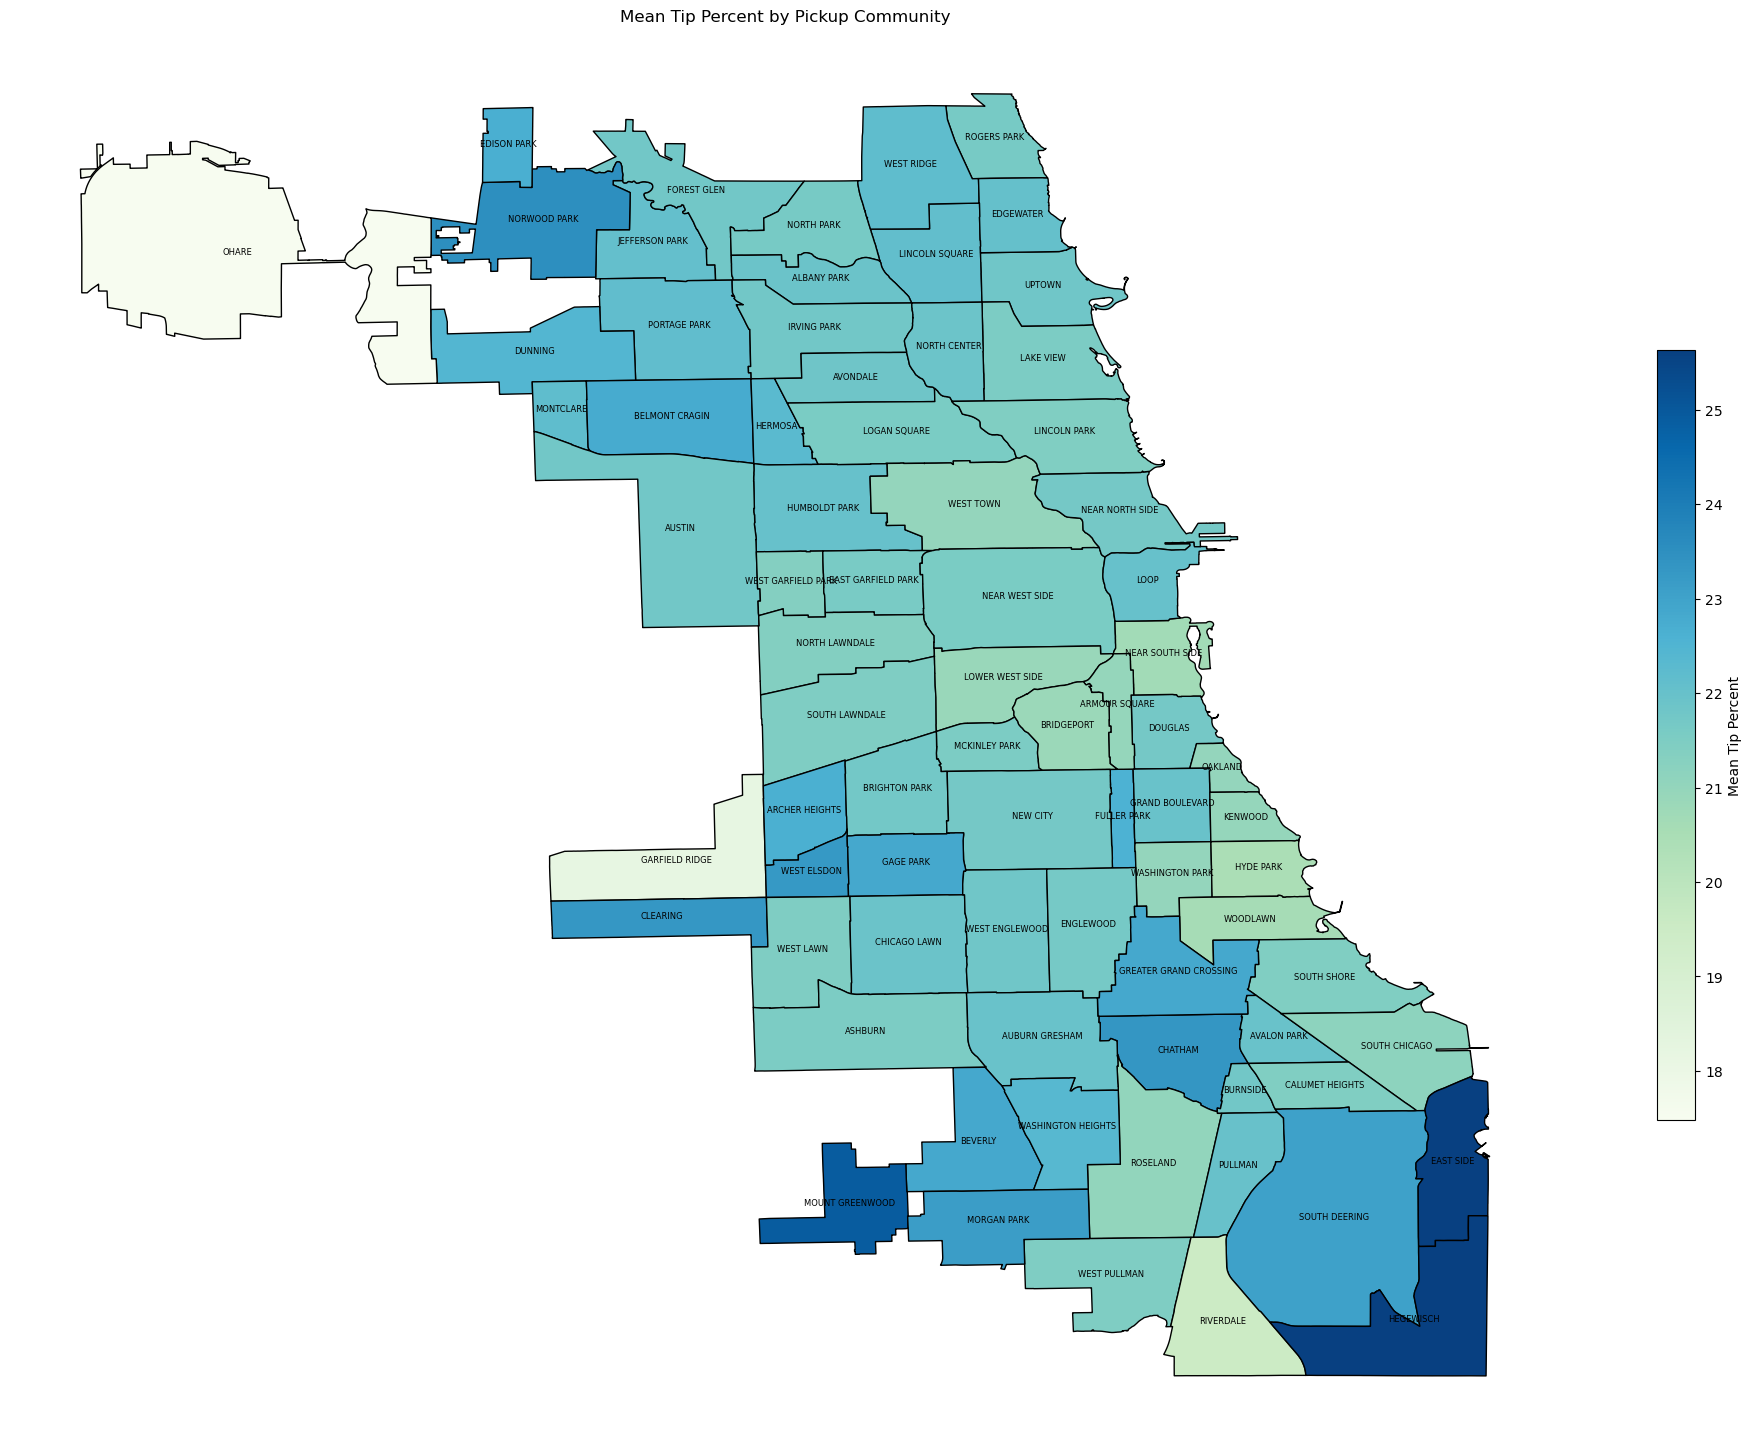

In [25]:
# group by community name and calculate the mean of tip
tip_mean_percent = df_2.groupby('Pickup Community Name')['Tip_percent_PerRide'].mean().reset_index(name='mean_tip_percent')

tip_mean_percent['Pickup Community Name'] = tip_mean_percent['Pickup Community Name'].str.upper()

tip_mean_percent.loc[tip_mean_percent['Pickup Community Name'] == 'THE LOOP', 'Pickup Community Name'] = 'LOOP'
tip_mean_percent.loc[tip_mean_percent['Pickup Community Name'] == "O'HARE", 'Pickup Community Name'] = 'OHARE'

# merge the mean tip with the shapefile based on the community area name
map_df = chicago.merge(tip_mean_percent, left_on='community', right_on='Pickup Community Name')

# plot the map
fig, ax = plt.subplots(figsize=(25, 20))
map_df.plot(column='mean_tip_percent', cmap='GnBu', linewidth=1, ax=ax, edgecolor='0', legend=True, legend_kwds={
    'label': "Mean Tip Percent", 'orientation': "vertical", 'shrink': 0.5})

# add community names to the plot
for idx, row in map_df.iterrows():
    plt.annotate(text=row['community'], xy=row['geometry'].centroid.coords[0], ha='center', fontsize=6)
    
ax.axis('off')
ax.set_aspect('equal')
plt.title('Mean Tip Percent by Pickup Community')
plt.show()

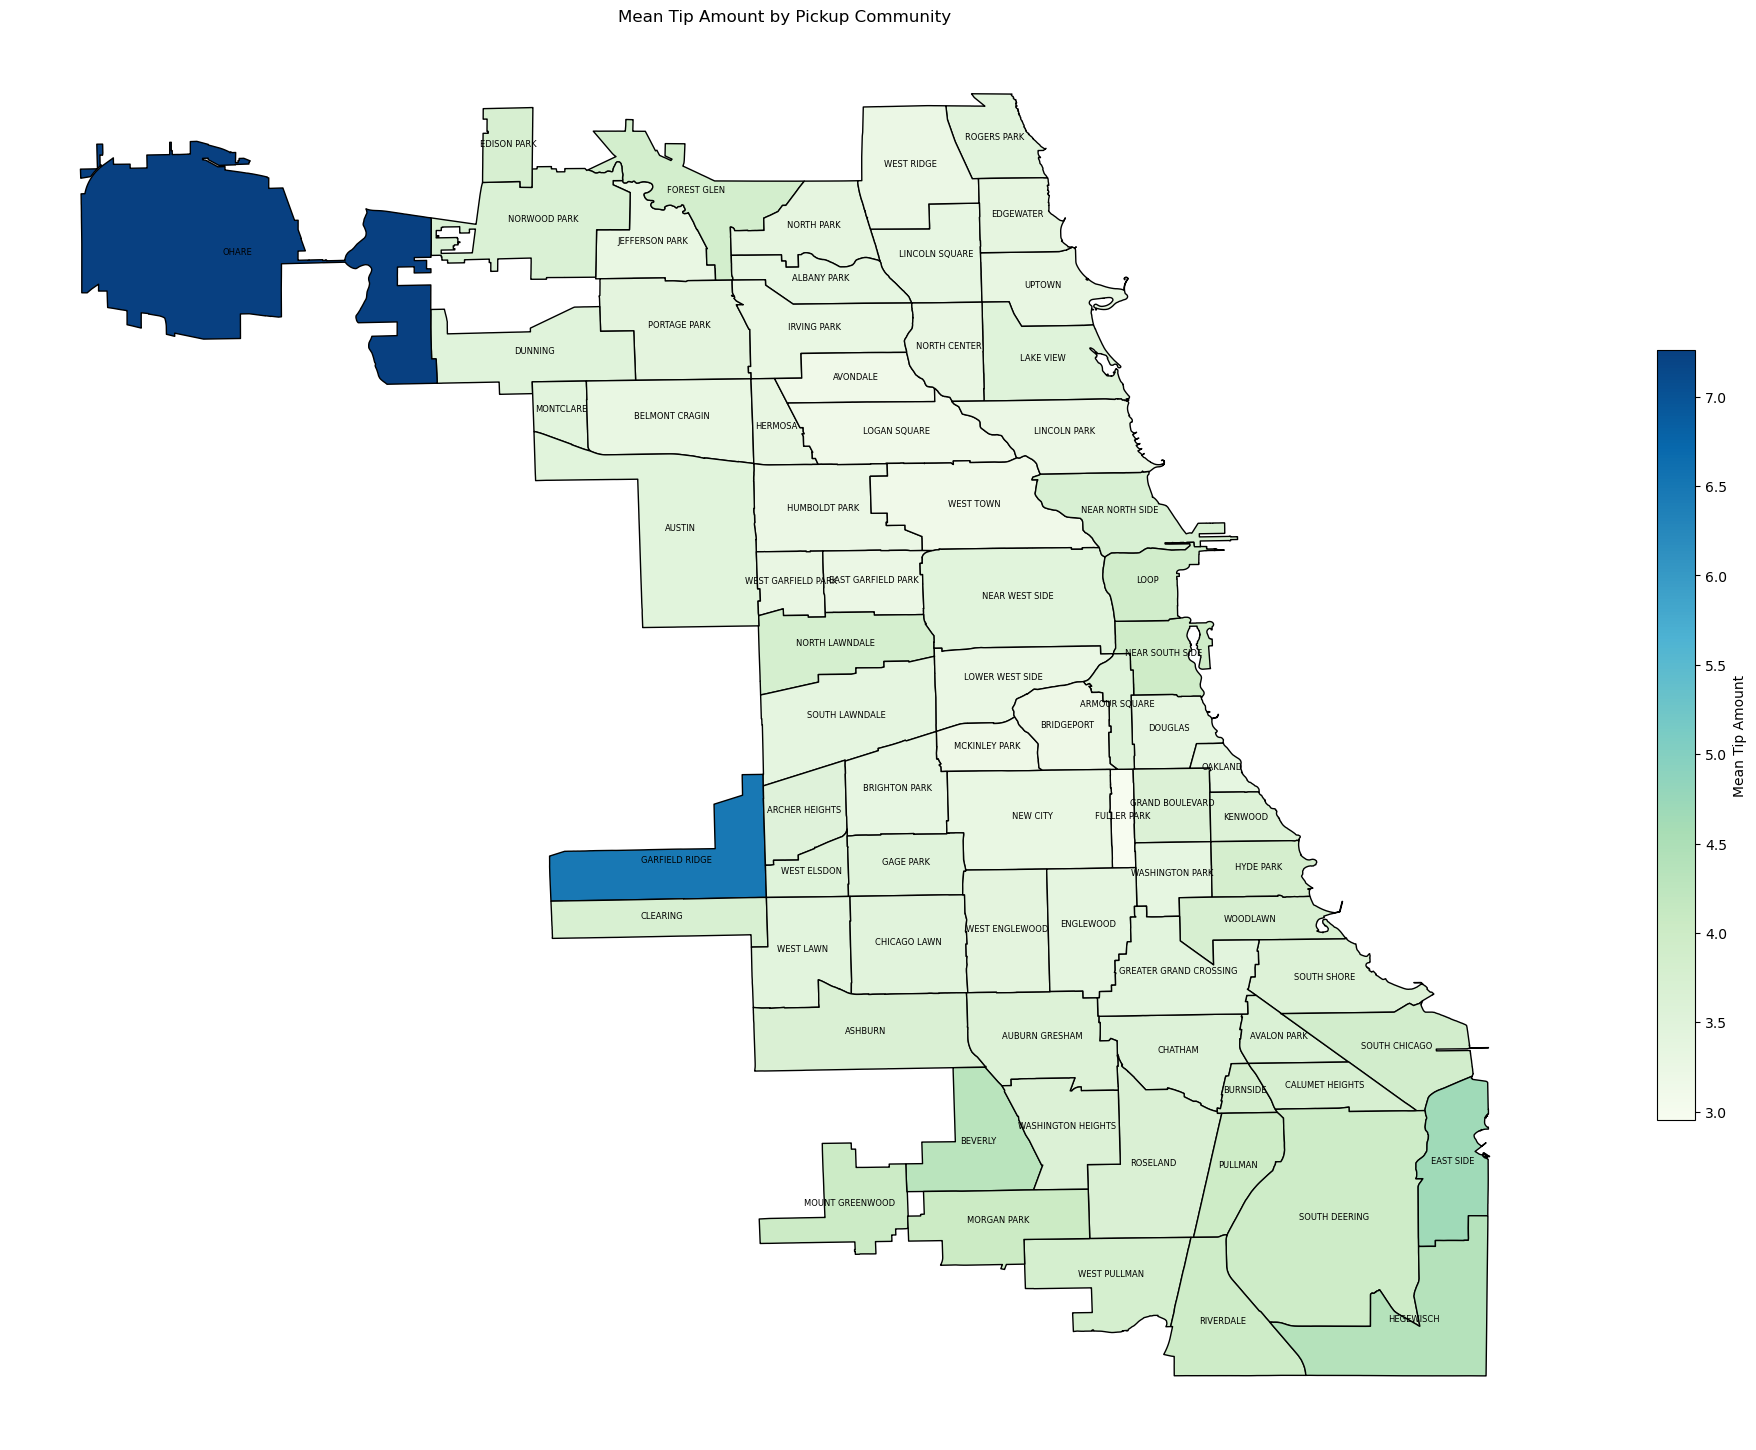

In [26]:
# group by community name and calculate the mean of tip
tip_mean = df_2.groupby('Pickup Community Name')['Tip'].mean().reset_index(name='mean_tip')

tip_mean['Pickup Community Name'] = tip_mean['Pickup Community Name'].str.upper()

tip_mean.loc[tip_mean['Pickup Community Name'] == 'THE LOOP', 'Pickup Community Name'] = 'LOOP'
tip_mean.loc[tip_mean['Pickup Community Name'] == "O'HARE", 'Pickup Community Name'] = 'OHARE'

# merge the mean tip with the shapefile based on the community area name
map_df = chicago.merge(tip_mean, left_on='community', right_on='Pickup Community Name')

# plot the map
fig, ax = plt.subplots(figsize=(25, 20))
map_df.plot(column='mean_tip', cmap='GnBu', linewidth=1, ax=ax, edgecolor='0', legend=True, legend_kwds={
    'label': "Mean Tip Amount", 'orientation': "vertical", 'shrink': 0.5})

# add community names to the plot
for idx, row in map_df.iterrows():
    plt.annotate(text=row['community'], xy=row['geometry'].centroid.coords[0], ha='center', fontsize=6)
    
ax.axis('off')
ax.set_aspect('equal')
plt.title('Mean Tip Amount by Pickup Community')
plt.show()

## Dropoff

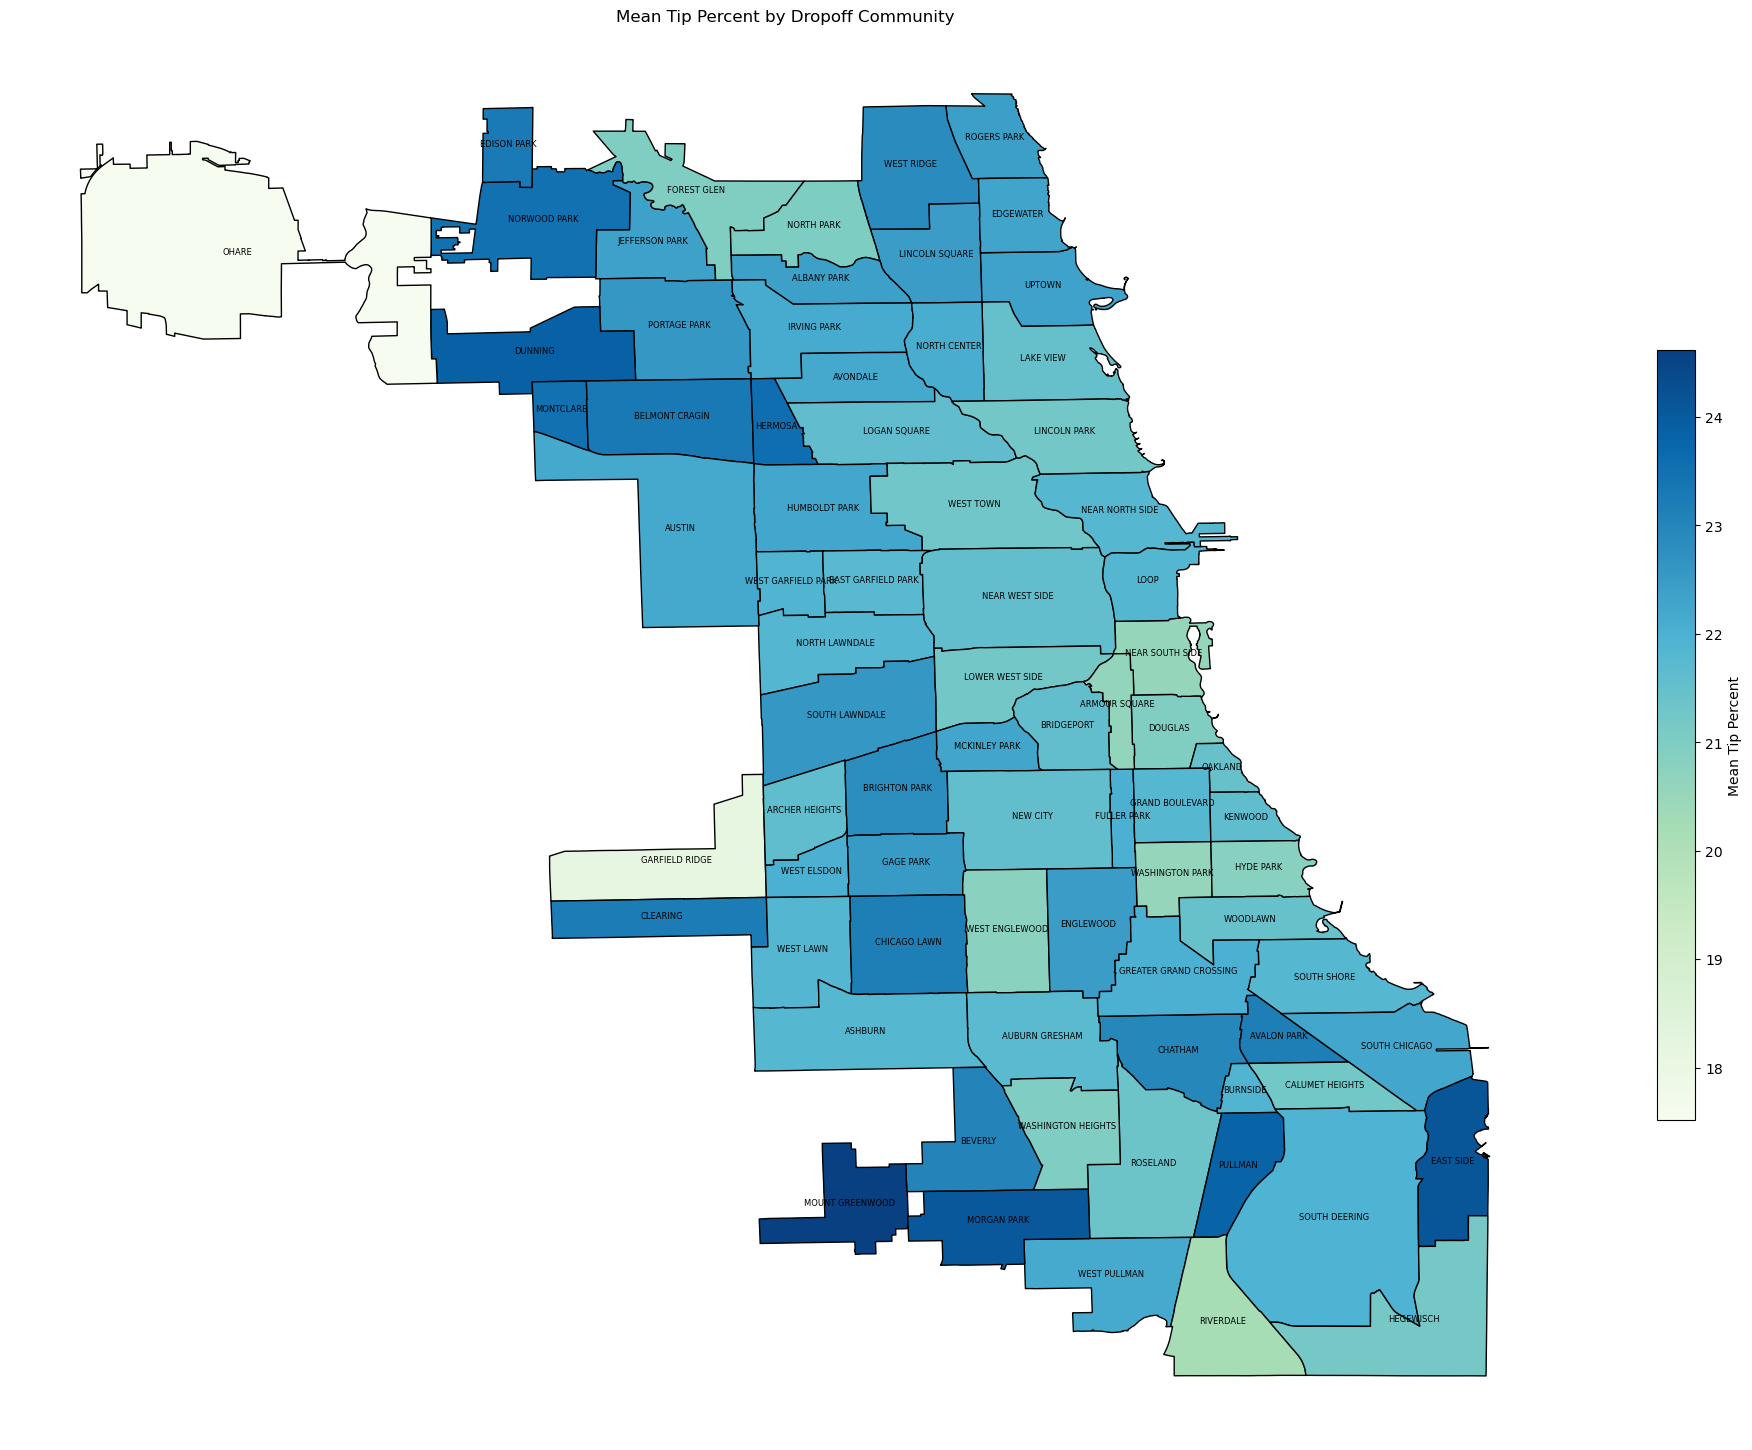

In [27]:
# group by community name and calculate the mean of tip
tip_mean_percent = df_2.groupby('Dropoff Community Name')['Tip_percent_PerRide'].mean().reset_index(name='mean_tip_percent')

tip_mean_percent['Dropoff Community Name'] = tip_mean_percent['Dropoff Community Name'].str.upper()

tip_mean_percent.loc[tip_mean_percent['Dropoff Community Name'] == 'THE LOOP', 'Dropoff Community Name'] = 'LOOP'
tip_mean_percent.loc[tip_mean_percent['Dropoff Community Name'] == "O'HARE", 'Dropoff Community Name'] = 'OHARE'

# merge the mean tip with the shapefile based on the community area name
map_df = chicago.merge(tip_mean_percent, left_on='community', right_on='Dropoff Community Name')

# plot the map
fig, ax = plt.subplots(figsize=(25, 20))
map_df.plot(column='mean_tip_percent', cmap='GnBu', linewidth=1, ax=ax, edgecolor='0', legend=True, legend_kwds={
    'label': "Mean Tip Percent", 'orientation': "vertical", 'shrink': 0.5})

# add community names to the plot
for idx, row in map_df.iterrows():
    plt.annotate(text=row['community'], xy=row['geometry'].centroid.coords[0], ha='center', fontsize=6)
    
ax.axis('off')
ax.set_aspect('equal')
plt.title('Mean Tip Percent by Dropoff Community')
plt.show()

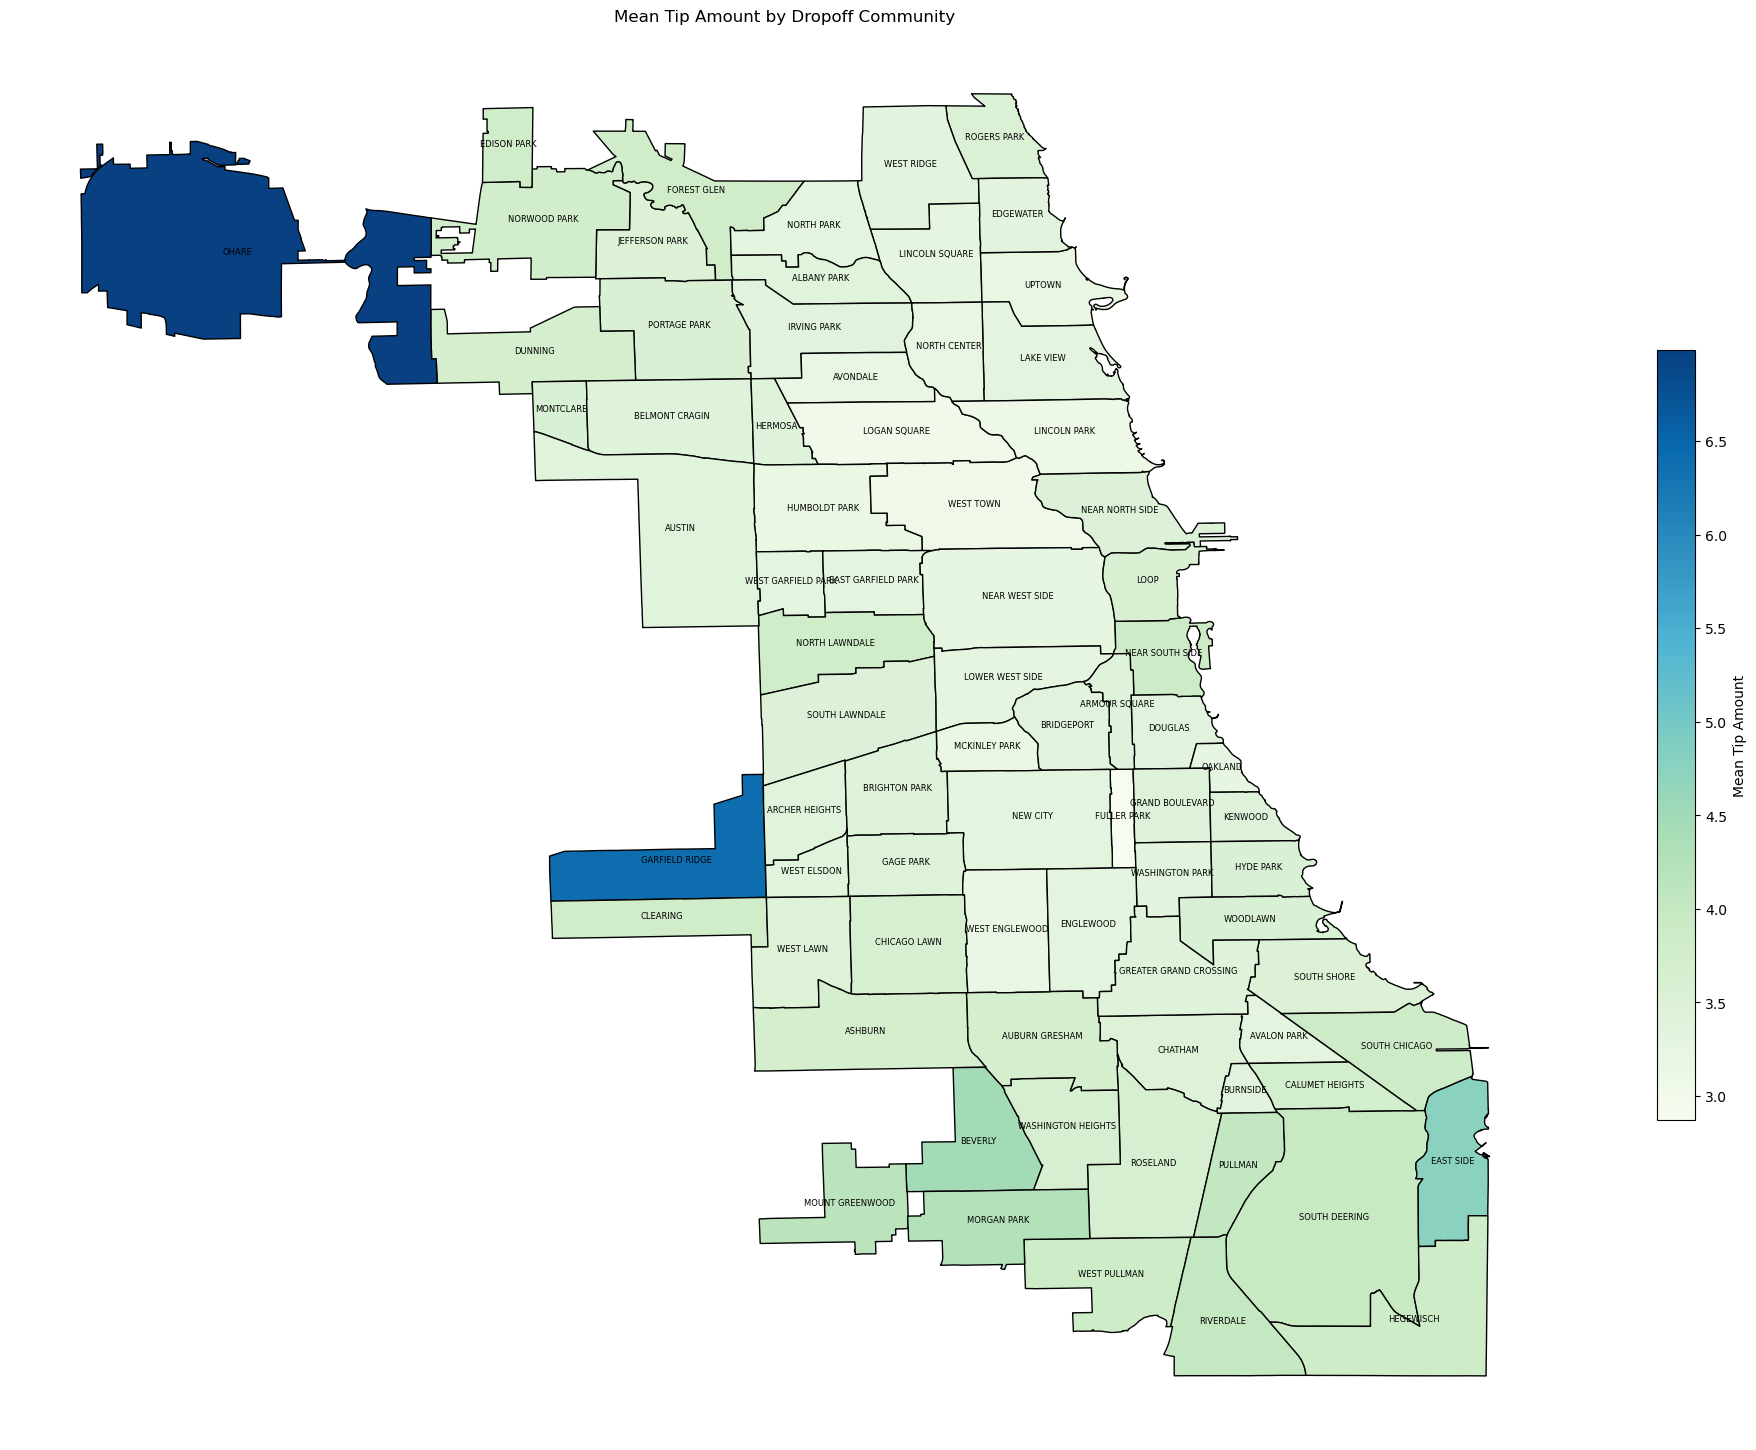

In [28]:
# group by community name and calculate the mean of tip
tip_mean = df_2.groupby('Dropoff Community Name')['Tip'].mean().reset_index(name='mean_tip')

tip_mean['Dropoff Community Name'] = tip_mean['Dropoff Community Name'].str.upper()

tip_mean.loc[tip_mean['Dropoff Community Name'] == 'THE LOOP', 'Dropoff Community Name'] = 'LOOP'
tip_mean.loc[tip_mean['Dropoff Community Name'] == "O'HARE", 'Dropoff Community Name'] = 'OHARE'

# merge the mean tip with the shapefile based on the community area name
map_df = chicago.merge(tip_mean, left_on='community', right_on='Dropoff Community Name')

# plot the map
fig, ax = plt.subplots(figsize=(25, 20))
map_df.plot(column='mean_tip', cmap='GnBu', linewidth=1, ax=ax, edgecolor='0', legend=True, legend_kwds={
    'label': "Mean Tip Amount", 'orientation': "vertical", 'shrink': 0.5})

# add community names to the plot
for idx, row in map_df.iterrows():
    plt.annotate(text=row['community'], xy=row['geometry'].centroid.coords[0], ha='center', fontsize=6)
    
ax.axis('off')
ax.set_aspect('equal')
plt.title('Mean Tip Amount by Dropoff Community')
plt.show()

In [29]:
df_2.head()

Trip Start Timestamp      Trip End Timestamp  Trip Seconds  Trip Miles  \
1   03/24/2019 10:15:00 AM  03/24/2019 10:30:00 AM         664.0         5.8   
3   03/24/2019 10:30:00 AM  03/24/2019 11:00:00 AM        2061.0        17.6   
7   03/24/2019 10:00:00 AM  03/24/2019 10:30:00 AM        1424.0         6.7   
11  03/24/2019 10:15:00 AM  03/24/2019 10:45:00 AM        1726.0         6.5   
29  03/24/2019 10:30:00 AM  03/24/2019 11:00:00 AM        1535.0        17.6   

    Pickup Census Tract  Dropoff Census Tract  Pickup Community Area  \
1          1.703183e+10          1.703108e+10                    3.0   
3          1.703108e+10          1.703198e+10                    8.0   
7          1.703183e+10          1.703184e+10                   22.0   
11         1.703103e+10          1.703122e+10                    3.0   
29         1.703198e+10          1.703108e+10                   76.0   

    Dropoff Community Area  Fare  Tip  Additional Charges  Trip Total  \
1                      8.0  10.0  2.0                2.55       14.55   
3                     76.0  25.0  5.0                7.55       37.55   
7                     32.0  10.0  2.0                2.55       14.55   
11                    22.0   7.5  2.0                0.00        9.50   
29                     8.0  22.5  6.0                7.55       36.05   

    Shared Trip Authorized  Trips Pooled  Pickup Centroid Latitude  \
1                    False             1                 41.958056   
3                    False             1                 41.907520   
7                    False             1                 41.915741   
11                    True             2                 41.962179   
29                   False             1                 41.979071   

    Pickup Centroid Longitude              Pickup Centroid Location  \
1                  -87.660389   POINT (-87.6603894557 41.958055933)   
3                  -87.626659  POINT (-87.6266589003 41.9075200747)   
7                  -87.692256  POINT (-87.6922563262 41.9157411934)   
11                 -87.645379   POINT (-87.6453787624 41.962178629)   
29                 -87.903040  POINT (-87.9030396611 41.9790708201)   

    Dropoff Centroid Latitude  Dropoff Centroid Longitude  \
1                   41.890922                  -87.618868   
3                   41.979071                  -87.903040   
7                   41.871016                  -87.631407   
11                  41.928391                  -87.704907   
29                  41.892042                  -87.631864   

               Dropoff Centroid Location             Trip Start UTC  \
1   POINT (-87.6188683546 41.8909220259)  2019-03-24 10:15:00+00:00   
3   POINT (-87.9030396611 41.9790708201)  2019-03-24 10:30:00+00:00   
7   POINT (-87.6314065252 41.8710158803)  2019-03-24 10:00:00+00:00   
11  POINT (-87.7049072355 41.9283913974)  2019-03-24 10:15:00+00:00   
29  POINT (-87.6318639497 41.8920421365)  2019-03-24 10:30:00+00:00   

           Trip Start Chicago               Trip End UTC  \
1   2019-03-24 05:15:00-05:00  2019-03-24 10:30:00+00:00   
3   2019-03-24 05:30:00-05:00  2019-03-24 11:00:00+00:00   
7   2019-03-24 05:00:00-05:00  2019-03-24 10:30:00+00:00   
11  2019-03-24 05:15:00-05:00  2019-03-24 10:45:00+00:00   
29  2019-03-24 05:30:00-05:00  2019-03-24 11:00:00+00:00   

             Trip End Chicago        Date  Hour              time  \
1   2019-03-24 05:30:00-05:00  2019-03-24     5  2019-03-24T05:00   
3   2019-03-24 06:00:00-05:00  2019-03-24     5  2019-03-24T05:00   
7   2019-03-24 05:30:00-05:00  2019-03-24     5  2019-03-24T05:00   
11  2019-03-24 05:45:00-05:00  2019-03-24     5  2019-03-24T05:00   
29  2019-03-24 06:00:00-05:00  2019-03-24     5  2019-03-24T05:00   

    temperature_2m (°C)  relativehumidity_2m (%)  precipitation (mm)  \
1                   3.6                       73                 0.0   
3                   3.6                       73                 0.0   
7                  

In [30]:
# Create a mean for tip percentage
grouped_mean = df_2.groupby([df_2.Date2]).mean()
grouped_sum = df_2.groupby([df_2.Date2]).sum()
rolling_avg = grouped_mean.rolling(window=30).mean()
rolling_sum = grouped_sum.rolling(window=30).mean()

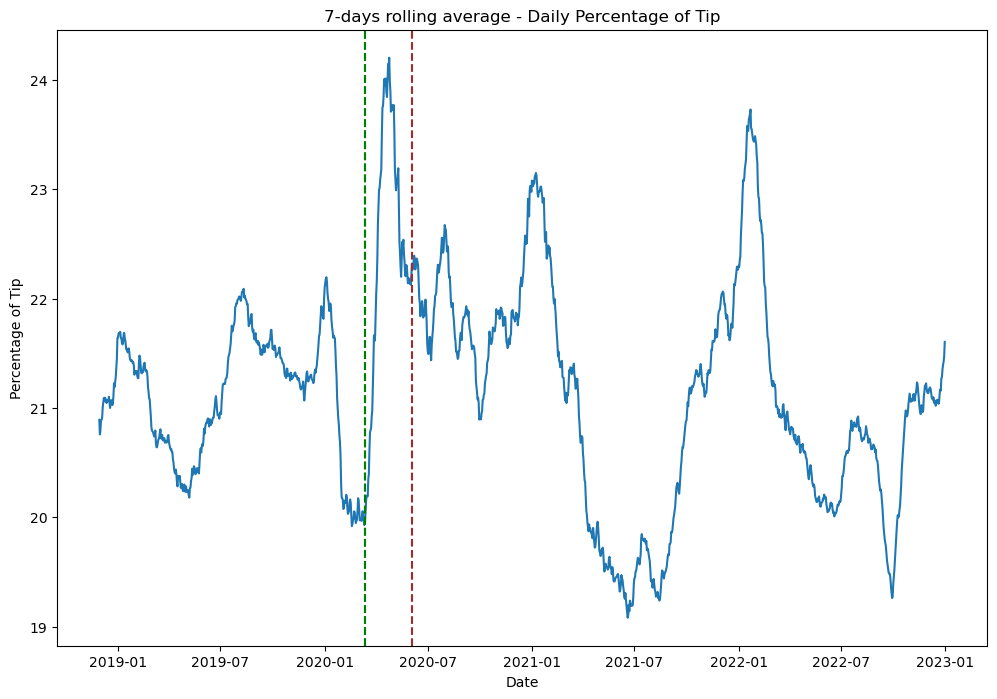

In [31]:
# Non rolling average plot
# Rolling average of tip percentage
plt.figure(figsize=(12, 8))

plt.plot(grouped_mean.index, rolling_avg['Tip_percent_PerRide'])

plt.xlabel('Date')
plt.ylabel('Percentage of Tip')
plt.title('7-days rolling average - Daily Percentage of Tip')

plt.axvline(pd.to_datetime('03/13/2020', format='%m/%d/%Y'), color='g', linestyle='--')

# Some events (to discuss)
# National Emergency
plt.axvline(pd.to_datetime('03/13/2020', format='%m/%d/%Y'), color='g', linestyle='--')

# https://chicago.suntimes.com/coronavirus/2020/5/28/21273554/coronvirus-chicago-reopening-businesses-restaurants-pandemic-rules-lightfoot
plt.axvline(pd.to_datetime('06/3/2020', format='%m/%d/%Y'), color='brown', linestyle='--')


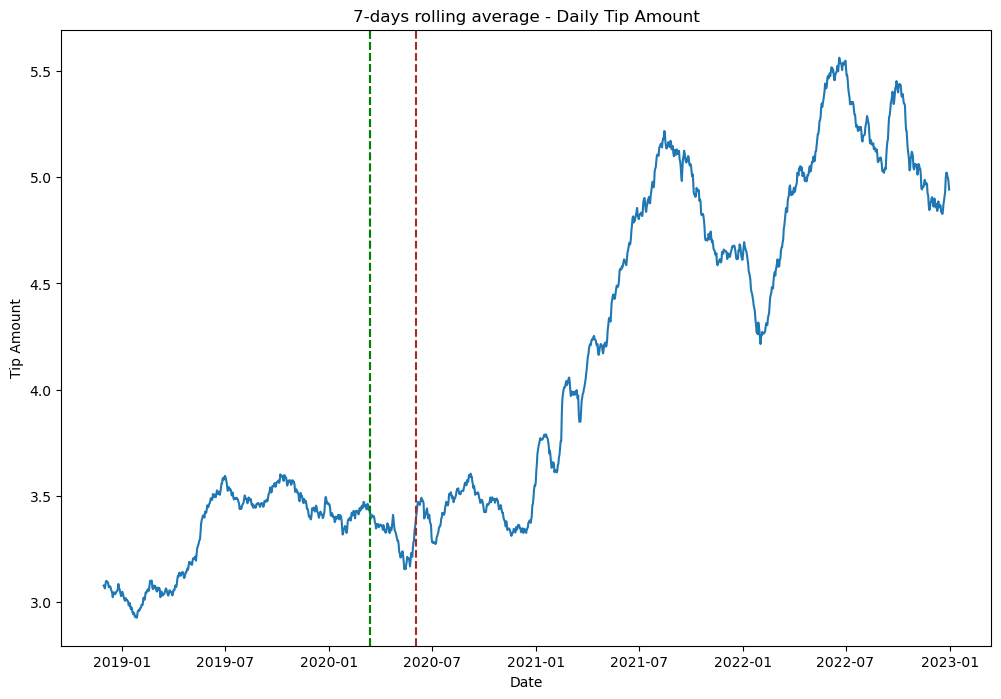

In [32]:
# Non rolling average plot
# Rolling average of tip percentage
plt.figure(figsize=(12, 8))

plt.plot(grouped_mean.index, rolling_avg['Tip'])

plt.xlabel('Date')
plt.ylabel('Tip Amount')
plt.title('7-days rolling average - Daily Tip Amount')

plt.axvline(pd.to_datetime('03/13/2020', format='%m/%d/%Y'), color='g', linestyle='--')

# Some events (to discuss)
# National Emergency
plt.axvline(pd.to_datetime('03/13/2020', format='%m/%d/%Y'), color='g', linestyle='--')

# https://chicago.suntimes.com/coronavirus/2020/5/28/21273554/coronvirus-chicago-reopening-businesses-restaurants-pandemic-rules-lightfoot
plt.axvline(pd.to_datetime('06/3/2020', format='%m/%d/%Y'), color='brown', linestyle='--')


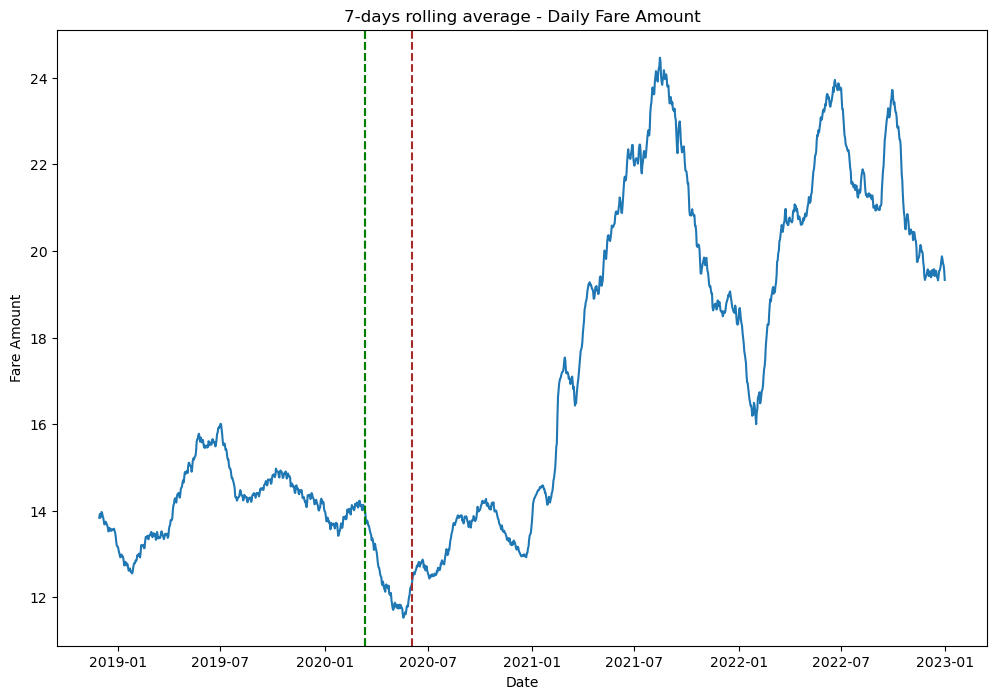

In [33]:
# Non rolling average plot
# Rolling average of tip percentage
plt.figure(figsize=(12, 8))

plt.plot(grouped_mean.index, rolling_avg['Fare'])

plt.xlabel('Date')
plt.ylabel('Fare Amount')
plt.title('7-days rolling average - Daily Fare Amount')

plt.axvline(pd.to_datetime('03/13/2020', format='%m/%d/%Y'), color='g', linestyle='--')

# Some events (to discuss)
# National Emergency
plt.axvline(pd.to_datetime('03/13/2020', format='%m/%d/%Y'), color='g', linestyle='--')

# https://chicago.suntimes.com/coronavirus/2020/5/28/21273554/coronvirus-chicago-reopening-businesses-restaurants-pandemic-rules-lightfoot
plt.axvline(pd.to_datetime('06/3/2020', format='%m/%d/%Y'), color='brown', linestyle='--')


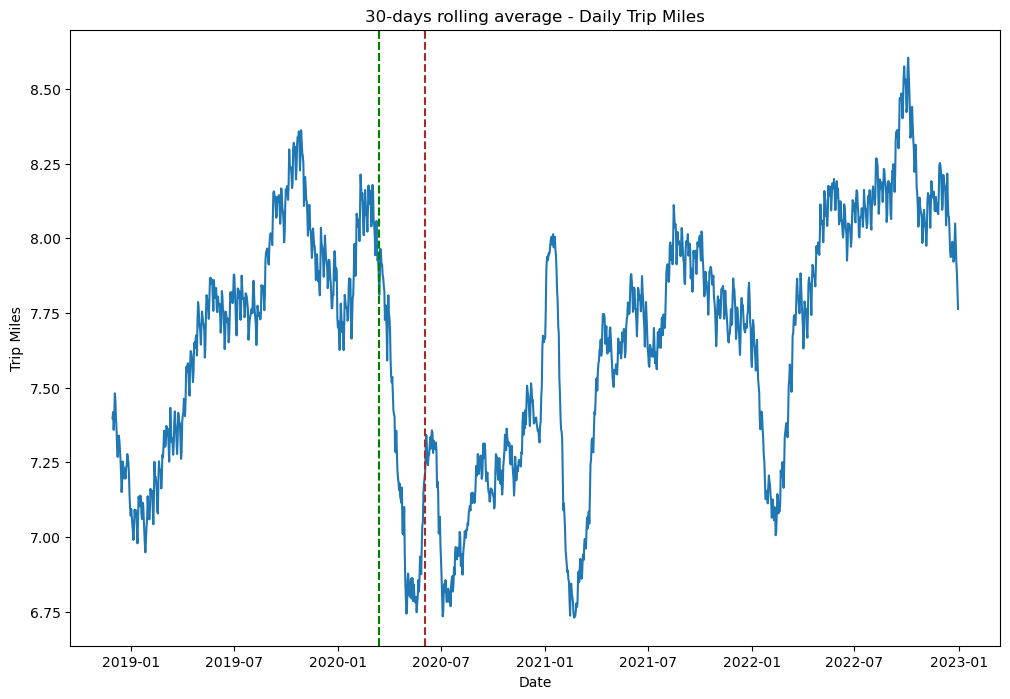

In [34]:
# Non rolling average plot
# Rolling average of tip percentage
plt.figure(figsize=(12, 8))

plt.plot(grouped_mean.index, rolling_avg['Trip Miles'])

plt.xlabel('Date')
plt.ylabel('Trip Miles')
plt.title('30-days rolling average - Daily Trip Miles')

plt.axvline(pd.to_datetime('03/13/2020', format='%m/%d/%Y'), color='g', linestyle='--')

# Some events (to discuss)
# National Emergency
plt.axvline(pd.to_datetime('03/13/2020', format='%m/%d/%Y'), color='g', linestyle='--')

# https://chicago.suntimes.com/coronavirus/2020/5/28/21273554/coronvirus-chicago-reopening-businesses-restaurants-pandemic-rules-lightfoot
plt.axvline(pd.to_datetime('06/3/2020', format='%m/%d/%Y'), color='brown', linestyle='--')


In [35]:
# Create a mean for tip percentage
grouped_mean_all = df.groupby([df.Date2]).mean()
grouped_sum_all = df.groupby([df.Date2]).sum()
rolling_avg_all = grouped_mean_all.rolling(window=7).mean()
rolling_sum_all = grouped_sum_all.rolling(window=7).mean()

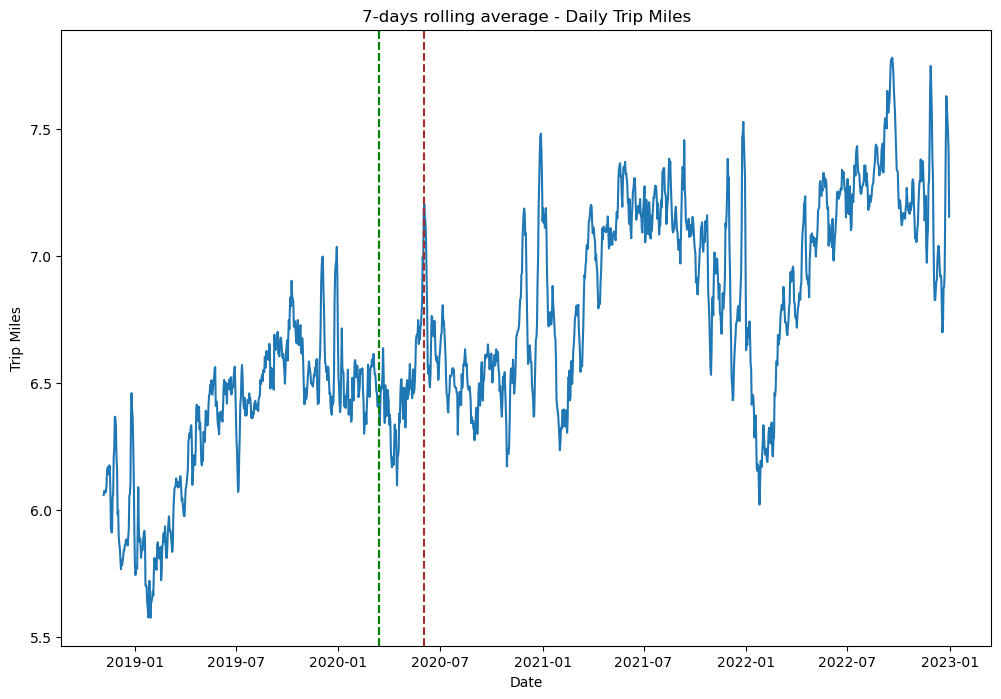

In [36]:
# Non rolling average plot
# Rolling average of tip percentage
plt.figure(figsize=(12, 8))

plt.plot(grouped_mean.index, rolling_avg_all['Trip Miles'])

plt.xlabel('Date')
plt.ylabel('Trip Miles')
plt.title('7-days rolling average - Daily Trip Miles')

plt.axvline(pd.to_datetime('03/13/2020', format='%m/%d/%Y'), color='g', linestyle='--')

# Some events (to discuss)
# National Emergency
plt.axvline(pd.to_datetime('03/13/2020', format='%m/%d/%Y'), color='g', linestyle='--')

# https://chicago.suntimes.com/coronavirus/2020/5/28/21273554/coronvirus-chicago-reopening-businesses-restaurants-pandemic-rules-lightfoot
plt.axvline(pd.to_datetime('06/3/2020', format='%m/%d/%Y'), color='brown', linestyle='--')


In [37]:
df_2.to_csv('Tipped_rides_analysis.csv')

In [38]:
import statsmodels.stats.proportion as smprop

# Define a function to perform the test for a given category
def test_category(df):
    post_covid_prop = df.loc[(df['postCovid_initial'] == 1), 'Tip_percent_PerRide'].mean()
    pre_covid_prop = df.loc[(df['preCovid'] == 1), 'Tip_percent_PerRide'].mean()
    n2 = len(df.loc[(df['postCovid_initial'] == 1)])
    n1 = len(df.loc[(df['preCovid'] == 1)])
    prop_diff = post_covid_prop - pre_covid_prop
    prop_diff_se = smprop.proportions_ztest([post_covid_prop*n2, pre_covid_prop*n1], [n2, n1])[1]
    return {'Category': category, 'COVID proportion': pre_covid_prop, 'Pre-COVID-recent proportion': post_covid_prop, 'Proportion difference': prop_diff, 'p-value': prop_diff_se}

# Loop through the categories and apply the test to each
test_results_tipperride = []


test_results_tipperride.append(test_category(df_2))
test = test_category(df_2)

if test['p-value'] < 0.05:
    print(f'The difference in the proportion of riders who tipped COVID and Post-COVID-recent is statistically significant at 95% confidence interval')
else:
    print(f'The difference in the proportion of riders who tipped COVID and Post-COVID-recent is statistically insignificant at 95% confidence interval')

The difference in the proportion of riders who tipped COVID and Post-COVID-recent is statistically insignificant at 95% confidence interval


## Trip Miles Significance test

In [40]:
import statsmodels.stats.proportion as smprop

# Define a function to perform the test for a given category
def test_category(df):
    post_covid_prop = df.loc[(df['postCovid_recent'] == 1), 'Trip Miles'].mean()
    pre_covid_prop = df.loc[(df['preCovid'] == 1), 'Trip Miles'].mean()
    n2 = len(df.loc[(df['postCovid_recent'] == 1)])
    n1 = len(df.loc[(df['preCovid'] == 1)])
    prop_diff = post_covid_prop - pre_covid_prop
    prop_diff_se = smprop.proportions_ztest([post_covid_prop*n2, pre_covid_prop*n1], [n2, n1])[1]
    return {'Category': category, 'COVID proportion': pre_covid_prop, 'Pre-COVID-recent proportion': post_covid_prop, 'Proportion difference': prop_diff, 'p-value': prop_diff_se}

# Loop through the categories and apply the test to each
test_results_miles = []

test_results_miles.append(test_category(df_2))
test = test_category(df_2)

if test['p-value'] < 0.05:
    print(f'The difference in the proportion of riders who tipped COVID and Post-COVID-recent is statistically significant at 95% confidence interval')
else:
    print(f'The difference in the proportion of riders who tipped COVID and Post-COVID-recent is statistically insignificant at 95% confidence interval')

The difference in the proportion of riders who tipped COVID and Post-COVID-recent is statistically insignificant at 95% confidence interval
